<html>
    <h4>&#129395; <font color=orange>Data from 2021 to 2023 use for Data Visualization</font></h4>
</html>

<html>
    <h1>&#129303; <font color=blue>Import required library</font></h1>
</html>

In [1]:
import pandas as pd
import glob
import re
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

<html>
    <h1>&#129303; <font color=blue>Read data from mulitple csv/excel files into one Dataframe</font></h1>
</html>

In [2]:
# # Get the full path of the folder
# folder_path = "2021_2023_data"

# # Get a list of all the Excel and CSV files in the folder
# file_list = glob.glob(folder_path + "/*.xlsx") + glob.glob(folder_path + "/*.csv")

# # Read each file into a DataFrame
# dataframes = []
# for file_path in file_list:
#     # Read the file into a DataFrame
#     dataframe = pd.read_excel(file_path) if file_path.endswith(".xlsx") else pd.read_csv(file_path)

#     # Add the DataFrame to the list of DataFrames
#     dataframes.append(dataframe)

# # Concatenate the DataFrames into one DataFrame
# df = pd.concat(dataframes, ignore_index=True)

# # Save the combined DataFrame to a new file
# df.to_csv("2021_2023_data.csv", index=False)

In [3]:
# read data from csv file 2021_2023_data.csv
df = pd.read_csv('2021_2023_data.csv')

<html>
    <h1>&#129303; <font color=blue>Data Understanding</font></h1>
</html>

In [4]:
# Preview Data
df

Unnamed: 0                                jobUrl  \
0               0  https://www.camhr.com/a/job/10548367   
1               1  https://www.camhr.com/a/job/10548371   
2               2  https://www.camhr.com/a/job/10548372   
3               3  https://www.camhr.com/a/job/10548373   
4               4  https://www.camhr.com/a/job/10548374   
...           ...                                   ...   
94621         243  https://www.camhr.com/a/job/10567272   
94622         244  https://www.camhr.com/a/job/10567273   
94623         245  https://www.camhr.com/a/job/10567274   
94624         246  https://www.camhr.com/a/job/10567275   
94625         247  https://www.camhr.com/a/job/10567276   

                                               job title  \
0                             Technician ____Very Urgent   
1                                   Freelance Counsellor   
2      Executive Secretary to the Vice President for ...   
3                              Event Planner (Siem Reap)   
4                              Digital Marketing Officer   
...                                                  ...   
94621                                  Event Coordinator   
94622                                  Event Coordinator   
94623                                  Event Coordinator   
94624                      Head of Business Intelligence   
94625                         Sales Manager ( Province )   

                                            company_name  \
0                                      S&V Cambodia Jobs   
1                       High Vibe Pte. Ltd (Safe Space™)   
2      ក្រុមហ៊ុន ម៉េងលី ជេ. គួច អេឌ្យូខេសិន (Mengly J...   
3      ក្រុមហ៊ុន ម៉េងលី ជេ. គួច អេឌ្យូខេសិន (Mengly J...   
4      ក្រុមហ៊ុន ម៉េងលី ជេ. គួច អេឌ្យូខេសិន (Mengly J...   
...                                                  ...   
94621                                    KONG NUON GROUP   
94622                                    KONG NUON GROUP   
94623                                    KONG NUON GROUP   
94624                     Orienda International Hospital   
94625                                    KONG NUON GROUP   

                                                position        Level  \
0                             Technician ____Very Urgent       Middle   
1                                   Freelance Counsellor       Middle   
2      Executive Secretary to the Vice President for ...       Middle   
3                              Event Planner (Siem Reap)  Entry Level   
4                              Digital Marketing Officer  Entry Level   
...                                                  ...          ...   
94621                                  Event Coordinator       Middle   
94622                                  Event Coordinator       Middle   
94623                                  Event Coordinator       Middle   
94624                      Head of Business Intelligence          Top   
94625                         Sales Manager ( Province )          Top   

      Year of Exp Hiring       Salary          Sex  ...  \
0               2      1  Negotiable          Male  ...   
1               ~      2  Negotiable             ~  ...   
2               2      1  Negotiable             ~  ...   
3               ~      1  Negotiable             ~  ...   
4               2      1  Negotiable   Male/Female  ...   
...           ...    ...          ...          ...  ...   
94621           ~      3  Negotiable   Male/Female  ...   
94622           ~      3  Negotiable   Male/Female  ...   
94623           ~      3  Negotiable   Male/Female  ...   
94624           5      ~  Negotiable   Male/Female  ...   
94625           3      3  Negotiable   Male/Female  ...   

                                         Industry  \
0       \n          Recruiting Services\n           
1      \n          Health/Personal Care\n           
2                 \n          Education\n           
3                 \n          Education\n           
4    

In [5]:
# Display dataframe information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94626 entries, 0 to 94625
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         94626 non-null  int64 
 1   jobUrl             94626 non-null  object
 2   job title          94626 non-null  object
 3   company_name       94624 non-null  object
 4   position           94626 non-null  object
 5   Level              94626 non-null  object
 6   Year of Exp        94626 non-null  object
 7   Hiring             94626 non-null  object
 8   Salary             94626 non-null  object
 9   Sex                94626 non-null  object
 10  Age                94626 non-null  object
 11  Term               94626 non-null  object
 12  Function/Category  94626 non-null  object
 13  Industry           94626 non-null  object
 14  Qualification      94626 non-null  object
 15  Language           94626 non-null  object
 16  Location           94626 non-null  objec

- jobUrl	    : The URL of the job posting.
- job title	    : The title of the job opening.
- company_name	: The name of the company hiring for the position.
- position	    : The specific position within the company that is being hired for.
- Level	        : The level of experience required for the position.
- Year of Exp	: The number of years of experience required for the position.
- Hiring	    : Whether the company is actively hiring for the position.
- Salary	    : The salary range for the position.
- Sex	        : The preferred sex of the applicant.
- Age	        : The preferred age range of the applicant.
- Term	        : The type of employment (full-time, part-time, contract, etc.).
- Function/Category	: The functional area or category of the job (e.g., engineering, sales, marketing, etc.).
- Industry	    : The industry in which the company operates.
- Qualification	: The educational qualifications required for the position.
- Language	    : The language skills required for the position.
- Location	    : The location where the job is located.
- Job Description	: A detailed description of the job duties and responsibilities.
- Job Requirement	: The specific skills and qualifications required for the position.
- Company Profile	: A brief description of the company, its products and services, and its culture.
- Publish Date	    : The date the job posting was published.
- Closing Date	    : The date the job posting will close.
- Contact Info	    : The contact information for the person responsible for hiring for the position.

#### Based on the information above
- the original data there is 94626 rows with 23 columns 
- for jobUrl ,Company Profile and Contact Info columns it seems not neccessary with Data Visualization so we can drop/skip them.
- In Data Visualization also not focused on Job Description and Job Requirement columns so we can drop/skip them.
- All columns are object or string types so we need to covert some columns to their right dTypes while cleaning.
- job title and position is the same data column so we can drop one of them.

<html>
    <h2>&#128576; <font color=red>Remove irrelevant data</font></h2>
</html>

In [6]:
#Check columns of Dataframe
df.columns

Index(['Unnamed: 0', 'jobUrl', 'job title', 'company_name', 'position',
       'Level', 'Year of Exp', 'Hiring', 'Salary', 'Sex', 'Age', 'Term',
       'Function/Category', 'Industry', 'Qualification', 'Language',
       'Location', 'Job Description', 'Job Requirement', 'Company Profile',
       'Publish Date', 'Closing Date', 'Contact Info'],
      dtype='object')

In [7]:
# Drop unnecessary columns such as Unnamed: 0,jobUrl,position,Company Profile and Contact Info
df.drop(columns=['Unnamed: 0','jobUrl','position','Company Profile','Contact Info'],inplace=True)
df.columns

Index(['job title', 'company_name', 'Level', 'Year of Exp', 'Hiring', 'Salary',
       'Sex', 'Age', 'Term', 'Function/Category', 'Industry', 'Qualification',
       'Language', 'Location', 'Job Description', 'Job Requirement',
       'Publish Date', 'Closing Date'],
      dtype='object')

In [8]:
df.head()

job title  \
0                         Technician ____Very Urgent   
1                               Freelance Counsellor   
2  Executive Secretary to the Vice President for ...   
3                          Event Planner (Siem Reap)   
4                          Digital Marketing Officer   

                                        company_name        Level Year of Exp  \
0                                  S&V Cambodia Jobs       Middle           2   
1                   High Vibe Pte. Ltd (Safe Space™)       Middle           ~   
2  ក្រុមហ៊ុន ម៉េងលី ជេ. គួច អេឌ្យូខេសិន (Mengly J...       Middle           2   
3  ក្រុមហ៊ុន ម៉េងលី ជេ. គួច អេឌ្យូខេសិន (Mengly J...  Entry Level           ~   
4  ក្រុមហ៊ុន ម៉េងលី ជេ. គួច អេឌ្យូខេសិន (Mengly J...  Entry Level           2   

  Hiring       Salary          Sex            Age  \
0      1  Negotiable          Male        18 ~ 30   
1      2  Negotiable             ~  Age Unlimited   
2      1  Negotiable             ~  Age Unlimited   
3      1  Negotiable             ~  Age Unlimited   
4      1  Negotiable   Male/Female  Age Unlimited   

                              Term  \
0  \n          Full Time\n           
1  \n          Part Time\n           
2  \n          Full Time\n           
3  \n          Full Time\n           
4  \n          Full Time\n           

                              Function/Category  \
0  \n          Technician/Maintenance\n           
1                  \n          Others\n           
2      \n          Education/Training\n           
3          \n          Administration\n           
4               \n          Marketing\n           

                                     Industry  \
0   \n          Recruiting Services\n           
1  \n          Health/Personal Care\n           
2             \n          Education\n           
3             \n          Education\n           
4             \n          Education\n           

                           Qualification  \
0  \n          Bachelor Degree\n           
1    \n          Master Degree\n           
2  \n          Bachelor Degree\n           
3  \n          Bachelor Degree\n           
4  \n          Bachelor Degree\n           

                                      Language  \
0         \n          English-- Good\n           
1  \n          Khmer-- Mother Tongue\n           
2         \n          English-- Good\n           
3         \n          English-- Good\n           
4         \n          English-- Good\n           

                           Location  \
0  \n          Phnom Penh\n           
1    \n          Overseas\n           
2  \n          Phnom Penh\n           
3   \n          Siem Reap\n           
4  \n          Phnom Penh\n           

                                     Job Description  \
0  • ធ្វើការវិនិច្ឆ័យជួសជុលនិងផ្ទៀងផ្ទាត់មុខងារត្...   
1                                                NaN   
2  - Manage and prioritize VPA’s calendar appoint...   
3  - Plan, design and produce school-related even...   
4  - Plan and execute all digital marketing, incl...   

                                     Job Requirement  \
0  • មានការយល់ដឹងខាងបច្ចេកទេសច្បាស់លាស់លើប្រព័ន្ធ...   
1                                                NaN   
2  - Excellent time management and organization s...   
3  - A bachelor degree in Business Administration...   
4  - BSc in Marketing, Communications, Journalism...   

               Publish Date               Closing Date  
0  Publish Date：Feb-17-2023   Closing Date：Mar-19-2023  
1  Publish Date：Feb-17-2023  Closing Date：Invalid date  
2  Publish Date：Feb-17-2023   Closing Date：Mar-19-2023  
3  Publish Date：Feb-17-2023   Closing Date：Mar-19-2023  
4  Publish Date：Feb-17-2023   Closing Date：Mar-19-2023

<html>
    <h2>&#129303; <font color=blue>Keep only English data/text (drop Khmer, Chinese,…from the dataset)</font></h2>
    <h3>&#128576; <font color=red>Remove Non-English text/data</font></h3>
</html>

In [9]:
# Assign Text data for testing
Text = [np.nan,'Senior Risk Officer ( Negotiable ), at បឹងកេងកង.','បុគ្គលិកផ្នែកលក់ នៅភ្នំពេញ ចំនួន ៣នាក់','បុគ្គលិកផ្នែកលក់ (ចុះលក់តាមឡាន) $280-$300 (បន្ថែមប្រាក់លើកទឹកចិត្តពីការលក់ប្រចាំខែ)','Warehouse Supervisor  500$-850$ ( based in Sre Ambel, Koh Kong)','Interior Designer / អ្នកតចនាផ្នែកខាងក្នុង']

# Convert to dataframe
data1 = pd.DataFrame({'Origin Text': Text})

# Define a regular expression pattern to match non-English characters
pattern = r'[^\x00-\x7F]+'

# Define a function to remove non-english text 
def clean_text(text):
    if isinstance(text, str):
        cleaned_text = re.sub(pattern, '', text)
        # If after remove non-english and the result is empty string convert it to NaN value
        if cleaned_text.strip() == '':
            return np.nan
        return cleaned_text
    else:
        return text

# Test by Applying the clean_text function to the 'English Text' column
data1['English Text'] = data1['Origin Text'].apply(clean_text)

# Display Testing data
data1

Origin Text  \
0                                                NaN   
1   Senior Risk Officer ( Negotiable ), at បឹងកេងកង.   
2             បុគ្គលិកផ្នែកលក់ នៅភ្នំពេញ ចំនួន ៣នាក់   
3  បុគ្គលិកផ្នែកលក់ (ចុះលក់តាមឡាន) $280-$300 (បន្...   
4  Warehouse Supervisor  500$-850$ ( based in Sre...   
5          Interior Designer / អ្នកតចនាផ្នែកខាងក្នុង   

                                        English Text  
0                                                NaN  
1           Senior Risk Officer ( Negotiable ), at .  
2                                                NaN  
3                                    () $280-$300 ()  
4  Warehouse Supervisor  500$-850$ ( based in Sre...  
5                               Interior Designer /

In [10]:
# Apply clean_text function to keep only english text on 4 columns Job Title, Job Description and Job Requirements columns
df['job title'] = df['job title'].apply(clean_text)
df['Job Description'] = df['Job Description'].apply(clean_text)
df['Job Requirement'] = df['Job Requirement'].apply(clean_text)

<html>
    <h2>&#128576; <font color=red>Deduplicated Data</font></h2>
</html>

In [11]:
# Check duplicate data
df.duplicated().sum()

2697

In [12]:
# Drop duplicate data
df = pd.DataFrame(df.drop_duplicates())
# Check duplicate data
df.duplicated().sum()

0

<html>
    <h2>&#128576; <font color=red>Deal with Missing Values</font></h2>
</html>

In [13]:
# Check missing values
df.isnull().sum()

job title            2613
company_name            2
Level                   0
Year of Exp             0
Hiring                  0
Salary                  0
Sex                     0
Age                     0
Term                    0
Function/Category       0
Industry                0
Qualification           0
Language                0
Location                0
Job Description      9816
Job Requirement      9390
Publish Date            0
Closing Date            0
dtype: int64

In [14]:
# Check missing values where job title is missing
rows_with_missing_position = df[df['job title'].isnull()]

# Display rows with missing 'Position' as a DataFrame
rows_with_missing_position

job title                                       company_name  \
27          NaN                       SyBelle Paris ស៊ីប៊ែល ប៉ារីស   
30          NaN                       SyBelle Paris ស៊ីប៊ែល ប៉ារីស   
31          NaN                       SyBelle Paris ស៊ីប៊ែល ប៉ារីស   
32          NaN                       SyBelle Paris ស៊ីប៊ែល ប៉ារីស   
33          NaN                       SyBelle Paris ស៊ីប៊ែល ប៉ារីស   
...         ...                                                ...   
94545       NaN  សាកលវិទ្យាល័យវិទ្យាសាស្ត្រសុខាភិបាល (Universit...   
94546       NaN  សាកលវិទ្យាល័យវិទ្យាសាស្ត្រសុខាភិបាល (Universit...   
94548       NaN  សាកលវិទ្យាល័យវិទ្យាសាស្ត្រសុខាភិបាល (Universit...   
94552       NaN  សាកលវិទ្យាល័យវិទ្យាសាស្ត្រសុខាភិបាល (Universit...   
94567       NaN                                         MSK Travel   

             Level Year of Exp Hiring       Salary          Sex  \
27             Top           ~      ~  Negotiable   Male/Female   
30     Entry Level           ~      ~  Negotiable   Male/Female   
31     Entry Level           ~      ~  Negotiable          Male   
32     Entry Level           ~      ~  Negotiable   Male/Female   
33     Entry Level           ~      ~  Negotiable   Male/Female   
...            ...         ...    ...          ...          ...   
94545            ~           ~      ~  Negotiable   Male/Female   
94546            ~           ~      ~  Negotiable   Male/Female   
94548            ~           ~      1  Negotiable   Male/Female   
94552            ~           ~      1  Negotiable   Male/Female   
94567       Middle           ~      1  Negotiable   Male/Female   

                 Age                             Term  \
27     Age Unlimited  \n          Full Time\n           
30     Age Unlimited  \n          Full Time\n           
31     Age Unlimited  \n          Full Time\n           
32     Age Unlimited  \n          Full Time\n           
33     Age Unlimited  \n          Full Time\n           
...              ...                              ...   
94545  Age Unlimited  \n          Full Time\n           
94546  Age Unlimited  \n          Full Time\n           
94548  Age Unlimited  \n          Full Time\n           
94552  Age Unlimited  \n          Full Time\n           
94567        18 ~ 25  \n          Full Time\n           

                               Function/Category  \
27               \n          Marketing\n           
30                   \n          Sales\n           
31                  \n          Others\n           
32              \n          Accounting\n           
33          \n          Administration\n           
...                                          ...   
94545   \n          Education/Training\n           
94546   \n          Education/Training\n           
94548   \n          Education/Training\n           
94552   \n          Education/Training\n           
94567  \n          Assistant/Secretary\n           

                                              Industry  \
27     \n          General Business Services\n           
30     \n          General Business Services\n           
31     \n          General Business Services\n           
32     \n          General Business Services\n           
33     \n          General Business Services\n           
...                                                ...   
94545                  \n          Education\n           
94546                  \n          Education\n           
94548                  \n          Education\n           
94552                  \n          Education\n           
94567                    \n          Tourism\n           

                               Qualification  \
27     \n          Bachelor Degree\n           
30     \n          Bachelor Degree\n           
31         \n          High School\n           
32     \n          Bachelor Degree\n           
33     \n          Bachelor Degree\n           
...                                      ...   
94545    \n      

In [15]:
# Drop rows where job title, company_name have missing values
df.dropna(subset=['job title'],inplace=True)
df.dropna(subset=['company_name'],inplace=True)

# Check missing values
df.isnull().sum()

job title               0
company_name            0
Level                   0
Year of Exp             0
Hiring                  0
Salary                  0
Sex                     0
Age                     0
Term                    0
Function/Category       0
Industry                0
Qualification           0
Language                0
Location                0
Job Description      8973
Job Requirement      8665
Publish Date            0
Closing Date            0
dtype: int64

<html>
    <h2>&#128576; <font color=red>Fix structural errors</font></h2>
</html>

In [16]:
# Rename some Columns
df.rename(columns = {'job title':'Job_Title',
                     'company_name':'Company_Name',
                     'Level':'Position_Level',
                     'Year of Exp':'Year_Experience',
                     'Sex':'Gender',
                     'Term':'Job_Type',
                     'Function/Category':'Job_Category',
                     'Job Description':'Job_Description',
                     'Job Requirement':'Job_Requirement',
                     'Publish Date':'Publish_Date',
                     'Closing Date':'Closing_Date'}, inplace = True)
df.head() 

Job_Title  \
0                         Technician ____Very Urgent   
1                               Freelance Counsellor   
2  Executive Secretary to the Vice President for ...   
3                          Event Planner (Siem Reap)   
4                          Digital Marketing Officer   

                                        Company_Name Position_Level  \
0                                  S&V Cambodia Jobs         Middle   
1                   High Vibe Pte. Ltd (Safe Space™)         Middle   
2  ក្រុមហ៊ុន ម៉េងលី ជេ. គួច អេឌ្យូខេសិន (Mengly J...         Middle   
3  ក្រុមហ៊ុន ម៉េងលី ជេ. គួច អេឌ្យូខេសិន (Mengly J...    Entry Level   
4  ក្រុមហ៊ុន ម៉េងលី ជេ. គួច អេឌ្យូខេសិន (Mengly J...    Entry Level   

  Year_Experience Hiring       Salary       Gender            Age  \
0               2      1  Negotiable          Male        18 ~ 30   
1               ~      2  Negotiable             ~  Age Unlimited   
2               2      1  Negotiable             ~  Age Unlimited   
3               ~      1  Negotiable             ~  Age Unlimited   
4               2      1  Negotiable   Male/Female  Age Unlimited   

                          Job_Type  \
0  \n          Full Time\n           
1  \n          Part Time\n           
2  \n          Full Time\n           
3  \n          Full Time\n           
4  \n          Full Time\n           

                                   Job_Category  \
0  \n          Technician/Maintenance\n           
1                  \n          Others\n           
2      \n          Education/Training\n           
3          \n          Administration\n           
4               \n          Marketing\n           

                                     Industry  \
0   \n          Recruiting Services\n           
1  \n          Health/Personal Care\n           
2             \n          Education\n           
3             \n          Education\n           
4             \n          Education\n           

                           Qualification  \
0  \n          Bachelor Degree\n           
1    \n          Master Degree\n           
2  \n          Bachelor Degree\n           
3  \n          Bachelor Degree\n           
4  \n          Bachelor Degree\n           

                                      Language  \
0         \n          English-- Good\n           
1  \n          Khmer-- Mother Tongue\n           
2         \n          English-- Good\n           
3         \n          English-- Good\n           
4         \n          English-- Good\n           

                           Location  \
0  \n          Phnom Penh\n           
1    \n          Overseas\n           
2  \n          Phnom Penh\n           
3   \n          Siem Reap\n           
4  \n          Phnom Penh\n           

                                     Job_Description  \
0    \n  Mercedes-Benz   Star Auto \n  Mercedes-B...   
1                                                NaN   
2  - Manage and prioritize VPAs calendar appointm...   
3  - Plan, design and produce school-related even...   
4  - Plan and execute all digital marketing, incl...   

                                     Job_Requirement  \
0   \n  Mercedes-Benz  \n     \n  \n  ,,   \n  \n...   
1                                                NaN   
2  - Excellent time management and organization s...   
3  - A bachelor degree in Business Administration...   
4  - BSc in Marketing, Communications, Journalism...   

               Publish_Date               Closing_Date  
0  Publish Date：Feb-17-2023   Closing Date：Mar-19-2023  
1  Publish Date：Feb-17-2023  Closing Date：Invalid date  
2  Publish Date：Feb-17-2023   Closing Date：Mar-19-2023  
3  Publish Date：Feb-17-2023   Closing Date：Mar-19-2023  
4  Publish Date：Feb-17-2023   Closing Date：Mar-19-2023

In [17]:
# Check df columns
df.columns

Index(['Job_Title', 'Company_Name', 'Position_Level', 'Year_Experience',
       'Hiring', 'Salary', 'Gender', 'Age', 'Job_Type', 'Job_Category',
       'Industry', 'Qualification', 'Language', 'Location', 'Job_Description',
       'Job_Requirement', 'Publish_Date', 'Closing_Date'],
      dtype='object')

<html>
    <h3>&#128576; <font color=red>Remove begin - end whitespace of each columns</font></h3>
</html>

In [18]:
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

<html>
    <h3>&#129303; <font color=purple>Display data description</font></h3>
</html>

In [19]:
df.select_dtypes(include=['object']).describe()

Job_Title                      Company_Name Position_Level  \
count        89314                             89314          89314   
unique       32202                              3506              6   
top     Accountant  Premium Care Business Consulting         Middle   
freq           626                              8365          40343   

       Year_Experience Hiring      Salary       Gender            Age  \
count            89314  89314       89314        89314          89314   
unique              19     54           8            4            290   
top                  1      1  Negotiable  Male/Female  Age Unlimited   
freq             24313  44931       72376        59485          53144   

         Job_Type Job_Category                   Industry    Qualification  \
count       89314        89314                      89314            89314   
unique          6           37                         47                9   
top     Full Time        Sales  General Business Services  Bachelor Degree   
freq        88300        12076                      12552            73745   

              Language    Location Job_Description Job_Requirement  \
count            89314       89314           80341           80649   
unique             320         771           35604           39700   
top     English-- Good  Phnom Penh          #NAME?          #NAME?   
freq             62984       78353            3862             956   

                    Publish_Date               Closing_Date  
count                      89314                      89314  
unique                       885                        993  
top     Publish Date：Aug-08-2022  Closing Date：Invalid date  
freq                         441                       1784

<html>
    <h3>&#129303; <font color=purple>Visualize some columns</font></h3>
</html>

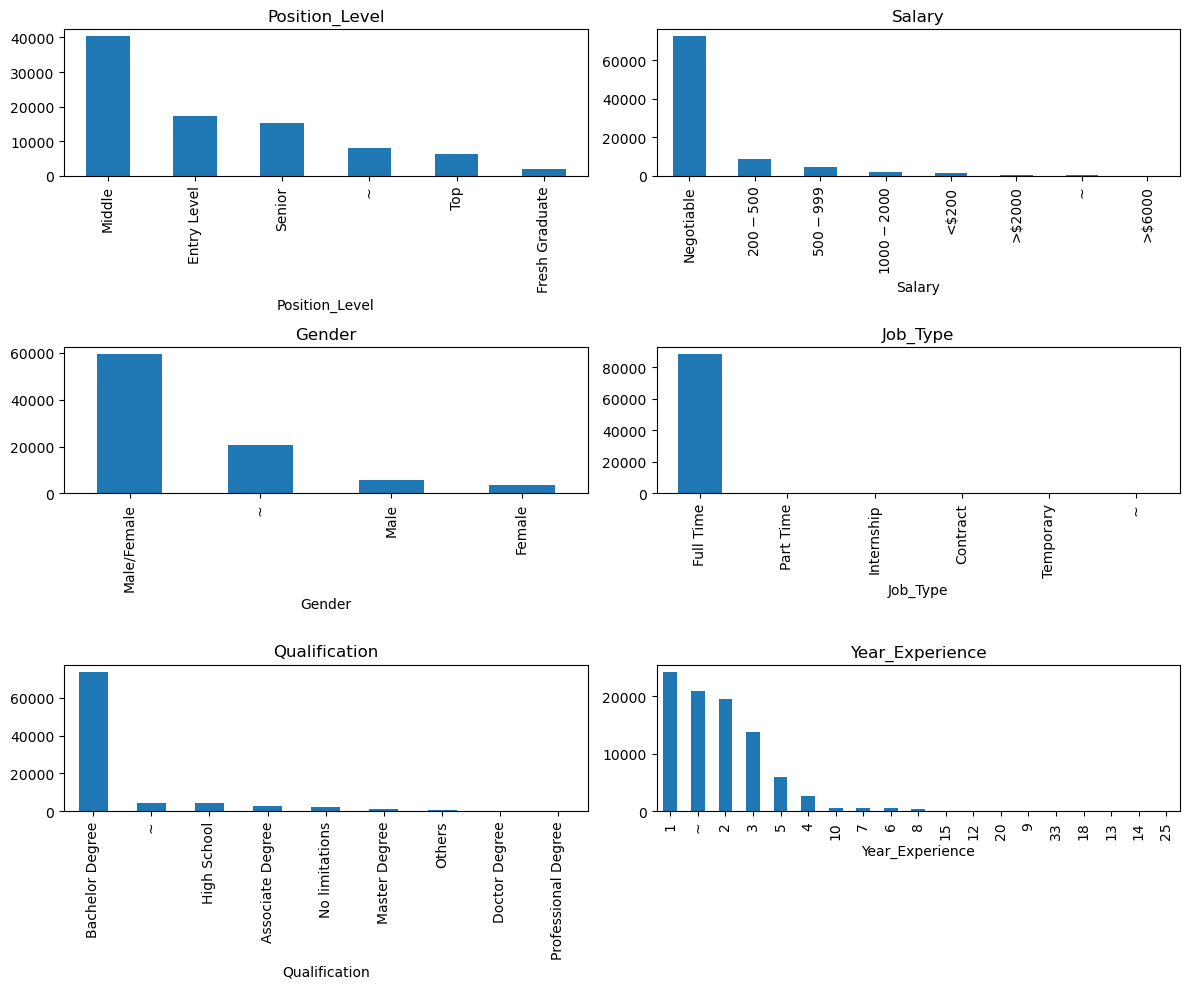

In [20]:
# Define the columns
columns = ['Position_Level', 'Salary', 'Gender', 'Job_Type','Qualification','Year_Experience']

# Create a figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Loop through the columns and create bar plots
for i, column in enumerate(columns):
    df[column].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(column)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

<html>
    <h1>&#129303;<font color=blue>Let's clean each column</font></h1>
</html>

<html>
    <h1><font color=orange>Job_Title</font></h1>
    <p><font color=blue></font></p>
    <div>
        <li><font color=blue> Try to remove punctuation before/after the job title</font></li>
        <li><font color=blue> Need to clean manually sometimes</font></li>
        <li><font color=blue> In case have more than one job title use slash (/), eg. Admin/Finance/...</font></li>
    </div>
</html>

In [21]:
df[['Job_Title']].head(50).style.background_gradient(cmap='jet')

<html>
    <h3>&#128576; <font color=green>Remove General Noisy Characters</font></h3>
</html>

In [22]:
# Define function to remove noisy string
def cleanText(text):
    if isinstance(text, str):
        text = re.sub('http\S+\s*', ' ', text)  # remove URLs
        text = re.sub('#\S+', '', text)  # remove hashtags
        text = re.sub('@\S+', '  ', text)  # remove mentions
        text = re.sub(r'[^\x00-\x7f]',r' ', text) 
        text = re.sub('\s+', ' ', text)  # remove extra whitespace
        return text
    else:
        return text

df['Job_Title'] = df['Job_Title'].apply(cleanText)

<html>
    <h3>&#129488; <font color=green>Check Text in parenthesis</font></h3>
</html>

In [23]:
# Define a function to remove whitespace begin end of text in parenthesis
def remove_whitespace_in_parentheses(text):
    matches = re.findall(r'\((.*?)\)', text)
    for match in matches:
        stripped_match = match.strip()
        text = text.replace(f'({match})', f'({stripped_match})')
    return text
df['Job_Title'] = df['Job_Title'].apply(remove_whitespace_in_parentheses)

In [24]:
# Define a function to extract words in parentheses
def extract_text_in_parenthesis(text):
    matches = re.findall(r'\((.*?)\)', text)
    return matches

# Apply the function to the column and flatten the list
text_in_parenthesis = df['Job_Title'].apply(extract_text_in_parenthesis).sum()

def display_common_text(text):
    # Remove empty string
    text = [item for item in text if item != '']
    # Remove space begin and end
    text = [item.strip() for item in text]
    # Count the frequency of each text
    word_counts = Counter(text)
    # Get the top most common text
    top_words = word_counts.most_common(100000)
    # Print the top words
    for word, count in top_words:
        print(f'{word}: {count}')

# Call function to display common text
display_common_text(text_in_parenthesis)

Urgent: 894
$300-$400: 617
$200-$250: 616
$200-$300: 578
Chinese Speaking: 454
$250-$350: 408
$300-$500: 332
Lubricant: 325
$400-$500: 279
Negotiable: 274
Phnom Penh: 241
Province: 231
$500-$700: 214
$250-$300: 200
$400-$600: 180
FairPlus Supermarket: 178
$350-$450: 166
$300-$600: 163
1 Position: 152
$180-$200: 147
1 position: 137
Very Urgent: 135
8am-5pm: 134
Internship: 132
$300-$350: 128
$500-$1000: 117
$500-$800: 112
Night Shift: 110
$1000-$1500: 109
Out Door: 106
$600-$800: 103
Siem Reap: 97
$800-$1500: 97
1 Post: 96
$150-$200: 95
01 Position: 94
Assistant Manager: 92
2 Positions: 89
Head Office: 88
$200 - $300: 85
$1K-$1.5K: 82
Female: 82
$400-$700: 82
$150-$160: 82
Expat: 75
PPSEZ: 74
01 Post: 73
$1000 - $1500: 72
Kampot: 71
Competitive Salary: 71
Food Industry: 70
Audi Cambodia: 70
F&B: 68
Intern and Junior: 68
Yamaha showroom: 66
IT Product: 65
$200 - $250: 65
2 positions: 64
01 position: 64
$200-$500: 63
Kampong Speu: 63
$150-$170: 62
1 post: 60
$400 - $500: 59
Real Estate: 5

In [25]:
# Define text that still keep in parenthesis
keep_parenthesis_text = ['Volunteer','Internship', 'Assistant Manager', 'Loan Officer', 'Accounting', 'Tax & Audit Firm', 'Software Support', 'Call Center', 'Pharmacist', 'Senior Credit Officer', 'Intern', 'Sales Representative', 'Medical Representative', 'Sales Executive', 'Japanese Translator/Interpreter', 'Junior Architect', 'Graphic Designer', 'Senior Application System Administrator', 'Project and Operation Support', 'Back/Front Desk Officer', 'Security Supervisor', 'Senior Graphic Designer', 'Interior Designer', 'Sale Supervisor', 'Junior Application System Administrator', 'Information System Auditor', 'HR Manager', 'Receptionist', 'Quantity Surveyor', 'Chief Executive Officer', 'Dealer Support', 'Senior Information System Auditor', 'Junior Security Operation Analyst', 'Database Administrator', 'HR Supervisor', 'Officer/Assistant Manager', 'System development programmer', 'Programmer', 'Internship Teller', 'Deputy Manager', 'Business Analyst', 'Information Quality Assurance Analyst', 'Senior Network and Security Engineer', 'Android Developer/Programmer', 'iOS Developer/Programmer', 'Senior Web Developer/Programmer', 'Salon Technician Leader', 'Software Support/Product Owner', 'Functional Support', 'Account Payable Officer', 'Loan Marketer and Credit Analysis Trainee', 'Web-Developer', 'Marketing Officer', 'Digital Loan Recovery Officer', 'Chinese Translator', 'Sales Showroom Consultant', 'Industrial Engineer', 'Junior Quality Assurance Analyst', 'Project Management Assistance', 'Project Coordinator', 'Mobile Banking and Merchant Sales', 'Branch Manager', 'Accountant Officer', 'Junior IT Security Officer', 'Video Editor & Design', 'Area Sale Supervisor', 'Area Sales Development Executive', 'Assistant General Manager', 'Data Collector', 'Local Consultants', 'Developer', 'PEM Engineer', 'Loan Recovery Officer', 'Logistics & Forwarder Sales', 'Medical Visitor', 'Software Developer', 'Android Development Engineer', 'Architectural Designer', 'Assistant Marketing Manager', 'C# Developer', 'Community Training Manager', 'Tax Account Supervisor', 'Collection Officer', 'Junior Business Analyst', 'IT Project Coordinator', 'Mechanical Engineer', 'Senior Web Developer / Programmer', 'Junior Web Developer/Programmer', 'SALES ENGINEER MANAGER', 'SAFETY MANAGER', 'Junior IT Security Analyst', 'Web Developer/Programmer', 'Digital Marketing & Design Officer', 'Vietnamese Translator', 'WCX Support', 'Biller Support', 'Stock Controller', 'Assistant Maintenance Technician', 'Sale Representative', 'Databased Management', 'Account Officer', 'Sport Trainer', 'Front-end / Back-end / Server manager', 'Trade Marketing Executive', 'Finance, Auditor, HR and Admin', 'Officer / Assistance Manager', 'Android Developer /Programmer', 'Network and Security Engineer', 'Application User Management Officer', 'Staff Management Officer', 'Online Digital Marketer', 'Site Engineer', 'Structural Designer', 'Senior/Junior', 'Sewage Management Technician', 'Boiler Controller', 'Oven Controller', 'General Workers', 'Legal Officer', 'Sale Coordinator', 'Product Manager', 'System Developer', 'Waiter', 'Waitress', 'Bank Account Supervisor', 'UI Designer', 'Electrician Supervisor', 'Front-end web Developer', 'MPL Manager', 'Sale Executive -Sale Manager', 'Pig Breeding Farm Manager', 'General Physician', 'Online Marketing Supervisor', 'Assistant Sales Representative', 'Digital Marketing Supervisor', 'English teacher', 'Front End Developer', 'Waiter-Waitress', 'Financial Analyst', 'Color Mixer', 'Embroidery Operator', 'Project Management and Operation Support', 'Social License & Community Relations Manager', 'Public Relations Officer', 'Accountants', 'Credit Officers', 'Clinical Research Assistant', 'Shop Assistant', 'Sale', 'Videographer/Motion Graphic Designer', 'Creative Graphic Designer', 'Warehoues Admin Officer', 'Cash Collector', 'Community Training Team Leader', 'Community Development Officers', 'Driver and Driver Assistant', 'Customer Service Officer', 'Freelance Recruitment Manager', 'Operation Assistant', 'Training Supervisor', 'Warehouse Team Leader', 'Sales Manager', 'Performance Management Supervisor', 'IT Manager', 'Sale / Logistic Driver', 'Accounting Assistant', 'Export Assistant', 'Supply / Drainage Engineer', 'Restaurant Supervisor', 'Production Operator', 'Senior Back-End', 'Project Sales Executive', 'Retail Sale Executive', 'DevOps & App Support', 'Human Resource Supervisor', 'Finance/Admin Officer', 'Sales Admin', 'Loan Inspection Officer', 'Leader of Human Resource', 'Translator', 'Production Line Facilitator', 'Purchasing Officer', 'Interior+Exterior+Architech', 'Shoe Maker', 'Expat Teacher', 'Production Officer', 'Marketing Supervisor', 'Construction Senior Executive', 'Technical Support Engineer', 'Recruitment & Training Supervisor', 'Batch Mixer Operator', 'Digital Marketing & Design Officer', 'Volunteer Officer', 'Product Consultant', 'HSE Supervisor', 'Product Stock Controller', 'Technical Officer', 'Demonstrator/Technical', 'Demonstrator/Technical of Outdoor Power Equipment and Cleaners', 'MCR Operator', 'Area Sales Manager', 'Senior Site Engineer', 'Admin and Operation Assistant', 'Project Manager / Coordinator', 'Bill collector', 'Thai Translator/Interpreter', 'Assistant Store General Manager', 'Native English Teacher', 'Project Manager', 'Treasury Officer', 'Server and Network Admin', 'Social Performance Management Officer', 'Electronic Technician', 'Assistant Cooker', 'Senior Loan Officer', 'Administration Leader', 'Junior Technical Support Engineer', 'Cost & Procurement Officer', 'Assistant Line Controller', 'Assistant Sales', 'Property Manager', 'Admin Supervisor', 'Accounting Executive', 'Sales Officer', 'Product Executive', 'Sale & Marketing Manager', 'Junior Program Support Officer', 'Stock Keeper', 'Assist Tour Operator', 'Korean Translator/Interpreter', 'Client Service Manager', 'Visa Operation Admin', 'Mechanical Technician-Production Line', 'Ticketing Officer', 'Assistant, Visa Operator', 'Video Editor / Graphic Designer', 'Senior Site Consulting Engineer', 'IT Technical Support Technician', 'IT Network Infrastructure Technician']

In [26]:
# Define function to remove noisy text in parenthesis
def remove_text_in_parenthesis(text):
    # Define a regular expression pattern to find text within parentheses
    pattern = r'\([^)]*\)'
    # Find all matches of the pattern in the text
    matches = re.findall(pattern, text)
    # Check if any of the matches contain the keep_parenthesis_text
    for match in matches:
        if not any(exception in match for exception in keep_parenthesis_text):
            # If exception is not found, remove the text within parentheses
            text = text.replace(match, '()')
    return text

In [27]:
# Apply function to the column
df['Job_Title'] = df['Job_Title'].apply(remove_text_in_parenthesis)
df[['Job_Title']].head(50).style.background_gradient(cmap='jet')

<html>
    <h3>&#128576; <font color=green>Remove Salary Pattern</font></h3>
</html>

In [28]:
# Define function to remove salary pattern 
def remove_salary_patterns(text):
    # Define the regular expression pattern to match salary patterns
    pattern = r'\b(?:\$\s?\d{1,3}(?:,\d{3})*(\.\d{2})?|\d{1,3}(?:,\d{3})*\s?[kK]?(?:\s?USD)?)\b'
    # Use re.sub() to replace the matched patterns with an empty string
    return re.sub(pattern, ' ', text)

# Apply function to column
df['Job_Title'] = df['Job_Title'].apply(remove_salary_patterns)

# Display dataframe
df[['Job_Title']].head(50).style.background_gradient(cmap='jet')

<html>
    <h3>&#129488; <font color=green>Check Text after parenthesis</font></h3>
</html>

In [29]:
# Define a function to extract text after )
def extract_text_after_parenthesis(text):
    parts = text.split(')')
    return [part.strip() for part in parts[1:]]

# Apply the function to the column and flatten the list
text_after_parenthesis = df['Job_Title'].apply(extract_text_after_parenthesis).sum()

# Call function to display common text
display_common_text(text_after_parenthesis)

(: 1556
.: 465
St. H.E. Chea Sophara: 410
$ -$: 232
, (: 169
-: 164
Icon Building: 139
PPSEZ: 116
- (: 104
,: 104
Urgent: 92
Koh Pich: 91
Toul Kork: 88
$- $: 86
- Japanese Company: 70
, $ -$: 67
Tomnub Kob Srov: 62
Boeng Keng Kang: 61
, at BKK.: 55
Sihanouk Ville: 54
$  - $: 54
$: 53
$ -  $: 52
, .: 49
Kampot: 43
Takeo: 43
Near Vimean Erkarech: 42
Sen Sok: 41
Cambodiana: 40
Near Independent Monument: 39
, at Koh Pich.: 39
St. H.E Chea Sophara: 38
Phnom Penh Thmei: 36
, at: 36
Toul Svay Prey: 34
Kampong Cham: 33
, at .: 32
, HE. Chea Sophara Street.: 32
Khan 7Makara: 31
Borey Premier Land SenSok: 29
Boeng Kok: 29
, $  - $: 29
, at Icon Building.: 29
,(Accounting, Tax & Audit Firm: 29
Positions: 28
Phnom Penh Thmey: 28
, at  .: 26
**: 25
Veng Sreng: 25
, Urgent.: 24
The Icon Professional Building: 23
Khan  Makara: 23
, $ -$ , at Toul Kork: 23
, Borey Chhouk Meas.: 23
, at Chroy Chang Var.: 23
Boeung Reang: 22
, at Toul Kok.: 22
, at Chea Sophara Street.: 22
, at Phnom Penh.: 21
HE. Chea 

In [30]:
# Define text that still keep
except_text = ['Representative','Teacher','Officer','Supervisor','Expatriate Teacher','Head Office','/Mobile Developers','Internship','Assistant Manager','Public Relations Coordinator','National Teacher','Senior Technical Engineer','Planner Assistant','Customer Service Officer','Teachers','teacher','teachers''Program Management Officer','Executive','Marketing Officer','Manager','Sales','Team leader','Architectural Designer','SUPERVISOR','Front-end / Back-end / Server manager','Sales Supervisor','Sales Channel','Presales Engineer','AUDIT And Social Compliance Manager','Compliance Executive','Products Sales Adviser','Sales Representative','Team/ Regional Manager/ Manager/Associate','Native ESL Teachers','cum Exams Officer','Engineers','Program Officer','Sr Sourcing Officer','Engineers','Supervisor','Accounting Manager','Admin/HR Officer','Purchasing Officer','Safety Officer','Sale','Math Teacher','Internship','Customer Service','Sales Supervisor','Sale Executive','administration Supervisor','Designer','Warehouse Manager','HR Officer','Assistant Admin','Senior Safety Officer','QS Engineer','Accountant','Engineer','Site Architect & Engineer','Accounting Supervisor','Product Developer','Sales Representative','Support Teacher','/ Deputy Chief of Road Keeper / Port Safety Manager','Engineering','Engineer','Sale and Operation Admin','Fresh Department Manager','cum Graphic Designer','Housekeeper','Spa Trainer','Merchandiser','Sale Team Leader','Community Training Officer','English teacher','Khmer teacher','Receptionist','Marketing Manager','Facility Supervisor','Accounting Assistant','Sales Supervisor','Personal Assistant','Assistant to CEO','Sales Executive','Quantity Surveyor','HR Administration Officer','Senior Credit Control Executive','Senior Graphic Designer','IT', 'Laboratory', 'IE', 'CCTV', 'Leasing', 'Collection', 'Inventory', 'HSE', 'Fleet', 'Delivery', 'AR', 'GPS', 'AP', 'Intercon Bookstore', 'Membership', 'Treasury', 'Credit', 'Payment', 'Car', 'Compliant', 'Alliance', 'MEP', 'Attendant', 'Net', 'MANAGER', 'Online','Chinese Translator','Sales Consultant','Nurse','x','Management','Production','Analyst','Staff','Specialist']

In [31]:
# Remove except_text from text_after_parenthesis
text_after_parenthesis = [text for text in text_after_parenthesis if all(word not in text for word in except_text)]
# Remove '(' from each text in text_after_parenthesis
text_after_parenthesis = [text.replace('(', '') for text in text_after_parenthesis]

In [32]:
# Define the characters to check for
characters_to_check = ['_', '-', '/', ',']
# Remove elements containing any of the specified characters
text_after_parenthesis = [text for text in text_after_parenthesis if not any(char in text for char in characters_to_check)]
# Remove empty string
text_after_parenthesis = [item for item in text_after_parenthesis if item != '']
# Display text after parenthesis
text_after_parenthesis

['Near Indra Devi high School',
 'St. H.E. Chea Sophara',
 'St. H.E. Chea Sophara',
 'Koh Pich',
 'Boeung Reang',
 'Anina Tower ',
 'Khan 7Makara',
 'Boeung Tompun',
 'Borey Premier Land SenSok',
 'Khan7Makara',
 'Anina Tower ',
 'Near Boeng Trabaek Market',
 'Poi Pet',
 'Near Aeon  Mall',
 'Boeng Trabaek',
 'GIA Tower Koh Pich',
 'Koh Pich',
 'Tomnub Kob Srov',
 'Independent Moment Area',
 'St. H.E. Chea Sophara',
 'Near Vimean Erkarech',
 'Near Vimean Erkareach',
 'St. H.E. Chea Sophara',
 'Koh Pich',
 'St. H.E. Chea Sophara',
 'The Icon Professional Building',
 '$',
 'Koh Pich',
 'Sihanouk Ville',
 'Near Chinese Embassy',
 'Koh Pich',
 'Chamkar Morn',
 'Khan7Maraka',
 'Sen Sok',
 'Khan  Makara',
 'Khan  Makara',
 'Boeng Keng Kang',
 'Boeng Keng Kang',
 'Chinese Speaking',
 'Chamkar Doung',
 'Positions',
 'Urgent!!!!',
 '.',
 'PPSEZ',
 'PPSEZ',
 'PPSEZ',
 'PPSEZ',
 'PPSEZ',
 'PPSEZ',
 'PPSEZ',
 'Chom Choa',
 'Near Aeon II',
 'The Icon Professional Building',
 'Borey Premier Land SenS

In [33]:
def remove_text_after_parenthesis(text, text_to_remove):
    pattern = r'\b(?:{})\b'.format('|'.join(re.escape(text) for text in text_to_remove))
    return re.sub(pattern, ' ', text)

# Apply the function to the column
df['Job_Title'] = df['Job_Title'].apply(lambda x: remove_text_after_parenthesis(x, text_after_parenthesis))

# Display dataframe
df[['Job_Title']].head(50).style.background_gradient(cmap='jet')

In [34]:
# Define a function to remove numbers, parentheses, and dollar signs
def remove_pattern(text):
    return re.sub(r'\d+|\(|\)|\$', ' ', text)

# Apply the function to the column
df['Job_Title'] = df['Job_Title'].apply(remove_pattern)

# Display dataframe
df[['Job_Title']].head(50).style.background_gradient(cmap='jet')

<html>
    <h3>&#129488; <font color=green>Check Text after underscore</font></h3>
</html>

In [35]:
# Define a function to extract text after _
def extract_text_after_underscore(text):
    parts = text.split('_')
    return [part.strip() for part in parts[1:]]

# Apply the function to the column and flatten the list
text_after_underscore = df['Job_Title'].apply(extract_text_after_underscore).sum()

# Call function to display common text
display_common_text(text_after_underscore)

Urgent: 359
Very: 235
Urgently: 118
-: 101
,  to  ,: 71
Siem Reap Campus: 48
Takeo Campus: 37
to: 32
,: 23
Takeo: 17
to  ,: 13
Posts: 12
AEON: 12
Urgent!: 11
x: 11
Up to  ,: 10
Kampong Cham Campus: 10
Campus: 9
Local and Expat      in Audit Tax-Accounting Firm: 9
- ,: 9
urgent: 9
-  .: 8
Expat: 7
,  to  ,  " ": 7
Sales Incentives: 7
Post: 7
Cash Sale Management: 7
Rebate: 7
Very    -: 5
KCRi: 5
up: 5
Urgent    .: 5
Phnom Penh: 5
up to  .: 5
work at VKirirom Pine Resort: 5
Chroy Chongva: 5
Fixed Asset: 5
!: 5
Material Medical: 5
Outdoor: 4
urgent   -: 4
Very Urgen: 4
. -: 4
Sihanoukville: 4
Thai: 4
Taxation: 4
Siem Reap: 4
" ": 4
TRAINER: 4
End Developer -: 4
SLH-Poultry :: 3
Siem Reap and   Campus: 3
Urgent  Special Economic Zone: 3
Vietnamese: 3
Toul Kork Campus: 3
Toul Kork: 3
.: 3
Sales: 3
,  to ,: 3
Custom Clearance: 3
AEON MaxValu: 3
Trade: 3
Morning &Afternoon Shift: 3
SME Coordinator: 3
~: 3
SAFETY AND ENVIRONMENT: 3
AIS: 3
VIDEO EDITOR: 3
NightShift: 3
&: 3
Phnom Penh Campus: 2

In [36]:
# Define text that still keep 
except_text_underscore = ['IT', 'Laboratory', 'IE', 'CCTV', 'Leasing', 'Collection', 'Inventory', 'HSE', 'Fleet', 'Delivery', 'AR', 'GPS', 'AP', 'Intercon Bookstore', 'Membership', 'Treasury', 'Credit', 'Payment', 'Car', 'Compliant', 'Alliance', 'MEP', 'Attendant', 'Net', 'MANAGER', 'Online','Driver','Cashier','Recruitment','Cash Sales Management','Product Personal Loan:','Sales','Local Expat  Tax-Accounting','Sales Incentives','TRAINER','End Developer','SME Coordinator','VIDEO EDITOR','Graphic Design Officer','Regional Sales Manager','Internship','Stock Officer','Unit Sales Project Manager','Specialist','Staff']

In [37]:
# Remove except_words from text_after_parenthesis
text_after_underscore = [text for text in text_after_underscore if all(word not in text for word in except_text_underscore)]
# Define the characters to check for
characters_to_check = ['_', '-', '/', ',']
# Remove elements containing any of the specified characters
text_after_underscore = [text for text in text_after_underscore if not any(char in text for char in characters_to_check)]
# Remove empty string
text_after_underscore = [item for item in text_after_underscore if item != '']
# Display text after underscore
text_after_underscore

['Very',
 'Phnom Penh Campus',
 'Takeo Campus',
 'Urgent',
 'Urgent!',
 'Very',
 'Takeo Campus',
 'AEON MaxValu Reoussey Keo',
 'Outdoor',
 'Outdoor',
 'Campus',
 'Campus',
 'Siem Reap and   Campus',
 'Siem Reap Campus',
 'Takeo',
 'Chbar Ampov Campus',
 'Sen Sok Campus',
 'Urgent',
 'Urgent',
 'Very',
 'Very',
 'Very',
 'Very',
 'Urgently',
 'Very',
 'Very',
 'Urgent',
 'Urgent',
 'Very',
 'Very',
 'Urgently',
 'Urgently',
 'Very',
 'Urgent',
 'Urgently',
 'Very',
 'Very',
 'Urgent',
 'Urgent',
 'Very',
 'Urgently',
 'Very',
 'Urgently',
 'Urgently',
 'Urgently',
 'Urgent',
 'Urgent',
 'Urgent',
 'Urgent',
 'Urgent',
 'Urgently',
 'Very',
 'Urgent',
 'Urgently',
 'Urgently',
 'Very',
 'Urgent',
 'Urgent',
 'Urgent',
 'Urgent',
 'Urgent',
 'Urgent',
 'Urgent',
 'Urgent',
 'Urgent',
 'Urgent',
 'Urgent',
 'Urgent',
 'Urgent',
 'Urgent',
 'Urgent',
 'Urgent',
 'Urgent',
 'Urgent',
 'Urgent',
 'Urgent',
 'Urgently',
 'Urgently',
 'Urgent',
 'Urgent',
 'Urgent',
 'Urgently',
 'Urgent',
 'V

In [38]:
# Define function to remove text in text_after_underscore
def remove_text_after_underscore(text, text_to_remove):
    pattern = r'(?:\b|_)({})(?:\b|_)'.format('|'.join(re.escape(text) for text in text_to_remove))
    return re.sub(pattern, ' ', text)

# Apply function to the column
df['Job_Title'] = df['Job_Title'].apply(lambda x: remove_text_after_underscore(x, text_after_underscore))

# Replace _ with ''
df['Job_Title'] = df['Job_Title'].str.replace('_', ' ')

# Display dataframe
df[['Job_Title']].head(50).style.background_gradient(cmap='jet')

<html>
    <h3>&#129488; <font color=green>Check Text after hyphen</font></h3>
</html>

In [39]:
# Define a function to extract text after -
def extract_text_after_hyphen(text):
    parts = text.split('-')
    return [part.strip() for part in parts[1:]]

# Apply the function to the column and flatten the list
text_after_hyphen = df['Job_Title'].apply(extract_text_after_hyphen).sum()

# Call function to display common text
display_common_text(text_after_hyphen)

.: 684
,: 193
Automotive Spare Part: 111
Fleet: 79
Province: 76
Japanese Company: 70
,  .: 63
FMCG: 48
Chef: 41
Automotive: 34
Sales Admin: 33
Channel Execution: 30
Dynamic Pharma: 29
. K: 27
Audi: 27
Housekeeping: 26
Dynamic Argon: 25
Modern: 25
post.: 25
Marketing: 24
Backend: 23
Public Relation: 23
end Coder: 23
Part Time: 23
Warehouse: 22
time: 20
End Developer: 20
T: 20
. ,: 20
Payment Acquisition: 20
Luxury Division: 20
Sales: 19
Project Management: 19
Digital Marketing: 19
Purchasing: 19
International Business: 19
MEP: 18
Sales Representative: 18
Hotel Supplies   ,  .: 18
Sales Assessment: 17
K: 17
Mechanical Engineering: 16
Structure: 16
Cleaner: 16
Customer Care: 16
Operation: 15
Retail Banking: 15
. k: 15
h pm.: 15
!!!: 15
Lubricant   , at  .: 15
Consumer Goods: 14
outdoor: 14
Speaking: 14
Graphic Design: 14
Grander Driver: 14
Accounting: 14
Commercial Banking: 13
]: 13
Financing: 13
Dynamic Distribution Co., Ltd: 12
speaking: 12
+: 12
Brand Execution: 12
Construction: 12
Acc

In [40]:
# Define text to remove after -
text_after_hyphen = ['','Baby Shop Chanel','Cbar Ampov.','Taiwanese','Borey','Cement','more','Chbar Armpov','Full Time','tongue','Kroung Soung','Sovanna Supermarket','Mgt','Pub , at Santhormuk.','Chouk Meas','Agrotechvita','Tuyn dng Nhn vin k ton thu','Tuyn dng Nhn vin k ton thu Full','known Insurance Company in','persons','Phone Accessories','Mee Chiet','plus','SOP','Visa Service','in house counsel','TPP','USA','KPS','Chhbar Ampov','Agrochemical Manufacturing Company in','needed for short','rgent','Cold kitchen','Send','time hoc Part','positions','Food Product','Grand','Non','Near Grand','Kompot','Negation','Salary Rate','in Thailand','Seafood','Food & Beverage','.k___','Indoor','. very','HBI','BattamBang','HRBP','Laos Campus','MK','Tours and Activities','full','GYM , at .','time / Native','Ocean Freight','native','Human Capital','Santhormuk.','Dynamic Distribution',', Aeon Mall','Automotive Spare Part','ThinkThink','time PRIVATE','RSME','FMCG','CN Speaking .','Utility','Near Airport','Fresh graduate are welcomed','TONT',',__ Urgen','Pub , .','Factory Based','First Aid Room','am','Reward','Near intercon','Afternoon Shift','SR','Dynamic Argon  & Provinces','Chinses Speaking','Cards Department','USD,','Con &MEP','Stop Tep Phon.','. very    and expat','Incentive','Salary Negation','Off','USD/month','Person','pm','SME Car Loan','Consumer Goods','k',', On',', & Kroung Soung','k_','DayNight Shift',', at HE.  . ,.','the experience','Event Team','.k__','PP','Canadia Tower.','Kompongcham & Suong','Credit Administration Department','Offline & Activation','am, at Psar Kandal.','Pub , hpm','province','VN','Part','outdoor','International Airport','Information Technology Department','Distribution Development','PONT','Free Lunch','for Hairextensions','Month','HGBFI','BB /','Planning Department','Fresh Graduate','Rate','in law','Exchang Square.',', Treasury','Acquisitions','Clothes Shop','Depend on Ability','BB / FMCG','Constructions','Cashew Nut , .','Finance Department','Luxury','L','Real Estate .','Clinic Doctor','IGCSE','/Month',':pm','m','ZARA Cambodia','Chines','MFI/Bank','CLUB, KTV LOCAL AC','KHK','Secondary','Conditioner Persons','.K_','.K___','New Distribution Business','Eastern Province','K and KG level','Hospital , Exchang Square.','Principal, very','branch','we Lady','at SSEZ','Key Account, Modern','Aesthetic Clinic','Time','Food Products','xpost','other benefit','Core ERP','Construction Materials,','Cambodia','HoReCa','hpm','MT','Kampong Trach.','Color Standard Board','time','Healthcare','Specialize in Law','Restaurant ,','Quick Kart','.k','Solar Industrial & Commercial Cambodia','Volvo',',Chea Sophara','UPC','TOFT','time or','One','Vietnam speaking','Aeon Mall','Y & Y Students','Off Mgt','One  at Toul Kok Campus','people','Luxury Brand','Food and Drug','Pharmacy Chanel','post','career','all subjects','hpm.',', at .','Kroung Suong','Japanese Company','Bavet, Cambodia','Tuk Tuk','from','from Grade','Commercial Department','K','Depo','be based in PV, SVR, OM, MK, KS, and KK',',Boeung Bay Torng','PM','HE.','Poultry','Clinic , at Stop Tep Phon.','Nanny','short','Lubrican','BattamBang , .','Spare P','Comis','Online ,','Chinese Speaking','Range','Upholstery & Furniture','be','Oudong','Operation, Chines Speaking','K__','ON','Along','IGCSE Experience',', Car  /','Prek Eng','Tire Product ,','Education Services company in','months','Post.','One   Campus','PTT','local','No Experience','CLUB,','month','Post','Sihanouk International Airport','Tek Tla','+ Incentive','Tou LeJour','SVR','Independent Area','Report  Record','Kompong Speu','Base','Stop Tep Phorn.','International Company','Truck','+Commission','Senior Sup','Operation Management Department','time  more  +++','Prey Sor','Loyalty Club','Chea Sophara Street','SDRC','Near','Depo .','being','long','ENCH','Near Canadia Tower.','Good','Ticket','Boeng Trorbehk','Speaking .','to','Singapore Company','Health Safety Environmental','St','time Native','HE.Pub , .','known International Banking in','Banking Unit','pax','K_','Hotpot',', at HE. Chea Sophara St. ,.','Peng Hout Boeug Snor.','labeling','Urgen','Beer ONT','Production Supervisors','Chea Sophara St.','KTV','Santhormuk','Kampuchea Krom Blvd','Food and Beverage','Time Clinic Nurse','OlymPia.','Mall',', Chea Sophara.','JP speaking','KP','ELV','Toul TomPoung','known Tech Company in','Automotive',',k_','IAC','Phone Accessories .','Food Services Company in','ham','Dynamic Argon','Air Freight','Seafood , .','Packaging Material','Boeung Bay Torng','JP Speaking','Cage & Count','Kompongcham','Part time  & Math','For Warehouse','Street','Dorm','Part time','Part Time','Destination','Clinic','only','Chea Sophara','KA','posts','Con','be based  PV, SVR, OM, MK, KS, and KK','Kitchen','Expat','Over Time','Receivable','known Group of Companies in','Cold Kitchen, Food Production','Vey','MONT','Wat Champous Kaerhk.','Speaking , .','Chamkar Dung','IT Product','Kitchen/Pizza Leader','BI','ONTRADE','Host Mass Services','US Upon Skills and Competence','l , Chouk Meas Campus','Pax','Poipet','Purchase  Pay','/  Speaking','Cbar Ampov','Provice','Chak Angre','kombol','Time Mandarin',', OlymPia.','Evening Shift PM','Toul kok','Sihanoul Ville','Posts','PM Planning & Spare Part','Sugar','Construction Site','SME','Toul Kok','Packaging','Sensodyne','Order  Cash','Base Kratie','OTC','Samnang','chinese speaking','Pub','Time Job','PP and Province .','Food Industry','Construction Materiel , .','Neg','Salary from','PR','Pizza','De','Consumer____ ,  ,','including package allowances','Nany','Diagnostic Lab',', PP','Near Psar Kandal',', Chines Speaking','Salary','year contract','known Apparel Retail Company in','FOE','Open for Expat Candidate','Part Time , Peng Hout Boeug Snor.','Consumer Business Department','Hotel , at Cbar Ampov.','St. Mong Rithy','Pick','HORECA','BTB','known Advertising Company in','Finishing','Full','Client & Event','Gross','Vietnamese','.k_','Gross / Month','ham.','New Vertical','salary','Cashew Nut','Steong Meanchey','Lounge','Guest House','St.','CSD','Sabay One','BIM','T TAFJ','AC','Mong Rithy','X','Hospital ,','Psar Kandal.',':am',', Near intercon','Billboard Advertising',',k__','PV','Fitness Center','Max','Primary Program','Creative Media , .','Teppanyaki Kitchen','One  at TK Campus','Sovannaphumi Kids','Base in Province','SUPERMARKET FOODMATE','known International Banking Industry in','Remuneration and Benefits','Near Sovanna Supermarket','Aeon','Kratie','OM','PREMIER BANKING','Organic Food','Surgeon','Agrotech Vita','th Month Salary','KS','KK','Construction Material','DIOR','in','post.',',Chea Sophara St.','All Programs','St m','Toul Kok.','Khan','in Accounting Firm','depends on Ability','Svay Rieng','Consumer____','Department','AgrotechVita','Dynamic Group','Domino Pizza','Oudong.','Brand Comm','US','Drink , Near Psar Kandal.','Stop Tep Phon','Consumer Lending','Air Con','Spare part','Drink','Only','Toul Kok Campus','___  Special Economic Zone','Primary, Junior & High School_Mao Tse Tong','x','DOS','Associate Level','Microfinance Experience','Time and Part Time','Budget','USD','Secondary , IGCSE','Canadia Tower','PSK','Primary, Junior & High','Domino','Chea Sophara.','A/P','INF','Utilities','Construction Material , at Cbar Ampov.','Lotteria','the ability','Campus','parties','Dark Stores','Kindergarten','Co., Ltd','Primary Health care','per months','PS and HS','people  only','K___','th salary','House Software Development','Cambridge Curriculum','Hospital','Both for local and foreigner','and On','On','Content & social media','Ticketing Retails','All Province','Can earned','plus Commission','Full time','Express','Basic Japanese read & write skills','known Financial Services Company in','High End On','Provinces','GYM','bonus','Mother','Kampong Som Province','Short Term','at HE. Chea Sophara St.','Housekeeping ,','Commission','Based in  Office','Special Economic Zone','Microfinance','Primary, Junior & High School_Mao Tse Tong and  Campus','CHLLExpress','CCT','HTS Singapore','at','Gastro',',BattamBang.','Siemreap Province','Domono Pizza','very','WORKING IN CAMBODIA','based','Bavet','PP and Province','plus Unlimited Commissions','of','Battambong','Salary:','FRENCH SPEAKING','Specialize in law','Kia Cambodia','persons.','BB','can cook  food','search local business contacts','hoc',' , at .','Time and Part','Dynamic Technology','Night shift',', at Stop Tep Phon.','expat','Restaurant','Cook Assistant','CONSUMER LENDING AND PARTNERSHIP',', ham','INDOOR','Province','Payroll & SME','term project','Guards','Vimean Erkareach.','and Part','Division',',Beong Keng Kang','Learning & Talent Management','PV, SVR, OM, MK, KS, and KK','Compliance& Contract','Automotive Spare part','Section','Engineer  Based on Experience','Near Canadia Tower','plus benefits','Franchise','PHNOM PENH','LOCAL','CN','Automobile','Electronic Product','Pallets','HE. Chea Sophara St.','ITD']  

In [41]:
# Define the characters to check for
characters_to_check = ['-', '/', ',']
# Remove elements containing any of the specified characters
text_after_hyphen = [text for text in text_after_hyphen if not any(char in text for char in characters_to_check)]
# Remove empty string
text_after_hyphen = [item for item in text_after_hyphen if item != '']
# Display text after hyphen
text_after_hyphen

['Baby Shop Chanel',
 'Cbar Ampov.',
 'Taiwanese',
 'Borey',
 'Cement',
 'more',
 'Chbar Armpov',
 'Full Time',
 'tongue',
 'Kroung Soung',
 'Sovanna Supermarket',
 'Mgt',
 'Chouk Meas',
 'Agrotechvita',
 'Tuyn dng Nhn vin k ton thu',
 'Tuyn dng Nhn vin k ton thu Full',
 'known Insurance Company in',
 'persons',
 'Phone Accessories',
 'Mee Chiet',
 'plus',
 'SOP',
 'Visa Service',
 'in house counsel',
 'TPP',
 'USA',
 'KPS',
 'Chhbar Ampov',
 'Agrochemical Manufacturing Company in',
 'needed for short',
 'rgent',
 'Cold kitchen',
 'Send',
 'time hoc Part',
 'positions',
 'Food Product',
 'Grand',
 'Non',
 'Near Grand',
 'Kompot',
 'Negation',
 'Salary Rate',
 'in Thailand',
 'Seafood',
 'Food & Beverage',
 '.k___',
 'Indoor',
 '. very',
 'HBI',
 'BattamBang',
 'HRBP',
 'Laos Campus',
 'MK',
 'Tours and Activities',
 'full',
 'Ocean Freight',
 'native',
 'Human Capital',
 'Santhormuk.',
 'Dynamic Distribution',
 'Automotive Spare Part',
 'ThinkThink',
 'time PRIVATE',
 'RSME',
 'FMCG',


In [42]:
# Define function to remove text after hyphen
def remove_text_after_hyphen(text, text_to_remove):
    pattern = r'\b(?:{})\b'.format('|'.join(re.escape(text) for text in text_to_remove))
    return re.sub(pattern, ' ', text)

# Assuming data['Cleaned_Job_Title'] contains the job titles
df['Job_Title'] = df['Job_Title'].apply(lambda x: remove_text_after_hyphen(x, text_after_hyphen))

# Replace - with /
df['Job_Title'] = df['Job_Title'].str.replace('-', ' / ')

# Display dataframe
df[['Job_Title']].head(500).style.background_gradient(cmap='jet')

<html>
    <h3>&#129488; <font color=green>Check Text after comma</font></h3>
</html>

In [43]:
# Define a function to extract phrases after )
def extract_text_after_comma(text):
    parts = text.split(',')
    return [part.strip() for part in parts[1:]]

# Apply the function to the column and flatten the list
text_after_comma = df['Job_Title'].apply(extract_text_after_comma).sum()

# Call function to display common text
display_common_text(text_after_comma)

.: 890
/: 774
Accounting: 98
Sales & Distribution: 92
Procurement: 79
Internal Audit: 62
Field Sales: 57
Talent Acquisition: 55
IT Audit: 51
Marketing: 47
/   .: 47
HE.  .: 44
MEP: 40
Branch Service Quality Unit: 37
Sales: 37
Compliance: 36
Database Administrator: 36
Digital Application Development Unit: 35
Tax & Audit Firm: 34
Application Development: 32
Project Sales: 32
Brand: 31
Administration: 31
Digital Marketing: 31
Customer Relations: 30
Digital Bill Pay Support Unit: 30
Tax & Advisory: 29
FX & Treasury Dealing Unit: 28
Business Development: 28
Technical Support & Project Implementation Unit: 26
Maintenance: 26
Inventory: 25
Circle: 25
Medical Sales: 24
Audit & Assurance: 24
Software Developer: 24
System and Application: 23
Operations: 23
Fertilizer: 23
Network Sales: 23
Chhouk Meas.: 23
Treasury: 22
Learning & Development: 22
Technical Sales: 22
IT Support: 22
Database Administration: 22
Risk & Compliance: 21
Event Management: 21
Transaction Banking: 21
Core Banking System: 20

In [44]:
# Define text to remove after comma
text_after_comma = ['IN','in','In','a','A','After','OF','FOR','B','OFF','Sangke','O','H','TO','S','UK','AA','U','PCS','KH','ENG','AIA','Dangkor','ACE','CAMPUS','TT','BMC','G','T','CAMPU','F','PIZZA','Q','S','M','U','And','Or','TO','FOR','for','For','to','To','VIETNAMESE','Prek', 'Anhchanh', 'Krang', 'Thnong','Anina', 'Tower','CHINESE SPEAKING','National' , 'Mid', 'level', 'Mao','TseTong', 'Penh', 'Fulltime', 'Paid', 'Branch', 'Branches', 'Ta Khmau', 'indoor', 'for', 'TV','to','FoodMeat','Provinc','Khmum','Speu','midwife', 'speaker', 'Speaker', 'Toul','Sangkea', 'sale Out', 's', 'Chq', 'Sub', 'khan Posenchey', 'Changvar', 'Promotion', 'Car', 'loan', 'Speaking', 'speaking', 'Chaom Chao', 'cum', 'Cum', 'KG', 'Pre level','I','II','III','HE.','Co.','Chhouk Meas.','HE','Ltd','Vimean Erkareach.','Stop Tep Phon.','MondolKiri.','speaking','Stop Tep Phorn.','Chhouk Var','Chip mong','under','YEAC.','Psar Kandal.','Sovanna Supermarket','Chhouk Meas','urgently','Boeung kok','Toul Sangke','Toul Tom Poung.','Air Port.','Bar','LD','mall II Area','ACE Samdach Pan.','National Road .','Co.,','JCI.','Phsar Thmey','Ugent.','Beoung Kok','Tek Thla','Sovanna Super Market','Svay Chrum','Chouk Meas','JCI.','YEAC.','Chouk Var','Students','base on experience','Phillip Priority','SIEM REAP','PREAH SIHANOUK','KAMPONG CHAM','PAOY PAET','Takmao Branch','SUONG BRANCH','KAMPOT','EARLY YEARS','Komar Cheat hospital.','HSE','Mao TseTong.','Kok Kleang.','FF and Dry','Above','Kandal','Sihanuok Ville','Language','ICT Primary and A Level Computer Science','Teuk Tla','Boeung Keg','Teuk Thla','st.','Toul kork','&amp','usd','Position','Chak AngReh Krom','Steung Mean Chey.','Banteaymeanchey','CheaSophara','TK Branch','Gross','CLUB,','KTV','LOCAL','AC','Native','HE.','benefits','other','Sovanna Supermarket']

In [45]:
# Define function to remove text in text_after_comma
def remove_text_after_comma(text, text_to_remove):
    pattern = r'\b(?:{})\b'.format('|'.join(re.escape(text) for text in text_to_remove))
    return re.sub(pattern, ' ', text)

# Apply function to the column
df['Job_Title'] = df['Job_Title'].apply(lambda x: remove_text_after_comma(x, text_after_comma))

# Display dataframe
df[['Job_Title']].head(500).style.background_gradient(cmap='jet')

In [46]:
# Replace , with /
df['Job_Title'] = df['Job_Title'].str.replace(',', ' / ')
# Replace - with /
df['Job_Title'] = df['Job_Title'].str.replace('-', ' / ')

# Define function to remove extra space
def remove_extra_spaces(sentence):
    cleaned_sentence = re.sub(' +', ' ', sentence)
    return cleaned_sentence
# Apply function to column 
df['Job_Title'] = df['Job_Title'].apply(remove_extra_spaces)

# Display dataframe
df[['Job_Title']].head(500).style.background_gradient(cmap='jet')

In [47]:
# Define some special text to remove and replace by /
text_to_remove = ["or","and","OR","Or","AND","And"]

def remove_phrases(text, phrases_to_remove):
    pattern = r'\b(?:{})\b'.format('|'.join(re.escape(phrase) for phrase in phrases_to_remove))
    return re.sub(pattern, ' / ', text)

# Apply function to column
df['Job_Title'] = df['Job_Title'].apply(lambda x: remove_phrases(x, text_to_remove))
# Replace & with /
df['Job_Title'] = df['Job_Title'].str.replace('&',' / ')
# Apply function to column 
df['Job_Title'] = df['Job_Title'].apply(remove_extra_spaces)

# Display dataframe
df[['Job_Title']].head(500).style.background_gradient(cmap='jet')

In [48]:
# Remove special characters except /
def remove_special_characters(text):
    # Define a pattern to match any character that is not a letter, digit, space, or forward slash
    pattern = r'[^a-zA-Z0-9 /]'
    return re.sub(pattern, ' ', text)

# Apply function to column 
df['Job_Title'] = df['Job_Title'].apply(remove_extra_spaces)

# Apply function to column
df['Job_Title'] = df['Job_Title'].apply(remove_special_characters)

# Display dataframe
df[['Job_Title']].head(500).style.background_gradient(cmap='jet')

<html>
    <h3>&#128576; <font color=green>Remove '/' if before or after '/' contain nothing or '/'</font></h3>
</html>

In [49]:
df['Job_Title'] = df['Job_Title'].str.split('/ /').str.join(' / ')
df['Job_Title'] = df['Job_Title'].apply(remove_extra_spaces)
df['Job_Title'] = df['Job_Title'].str.lstrip('/ / / /').str.rstrip('/ / / / /')
df['Job_Title'] = df['Job_Title'].str.replace('/ /',' / ')
df['Job_Title'] = df['Job_Title'].str.replace('//',' / ')
df['Job_Title'] = df['Job_Title'].str.split('/').str.join(' / ')
df['Job_Title'] = df['Job_Title'].apply(remove_extra_spaces)
df['Job_Title'] = df['Job_Title'].str.lstrip('/ / / /').str.rstrip('/ / / / /')

# Display dataframe
df[['Job_Title']].head(500).style.background_gradient(cmap='jet')

<html>
    <h3>&#129488; <font color=green>Check upper case text</font></h3>
</html>

In [50]:
def extract_uppercase_words(text):
    return re.findall(r'\b[A-Z]+\b', text)

# Apply functino to the columnn
uppercase_text = df['Job_Title'].apply(extract_uppercase_words).sum()

# Display the DataFrame with the extracted uppercase words
display_common_text(uppercase_text)

IT: 2727
HR: 2206
MEP: 642
QC: 427
MANAGER: 374
QA: 372
CEO: 285
OFFICER: 252
QS: 229
SALES: 205
UI: 193
UX: 191
SENIOR: 154
EXECUTIVE: 146
ADMIN: 125
VIP: 124
D: 114
E: 112
SUPERVISOR: 110
MARKETING: 109
ESL: 106
CCTV: 105
ACCOUNTANT: 102
MIS: 94
ASSISTANT: 92
C: 92
PHP: 73
ENGINEER: 73
AR: 71
DESIGNER: 70
GM: 60
SALE: 58
SERVICE: 56
MFI: 56
API: 55
AUDIT: 54
AP: 52
GRA: 51
FX: 51
PROJECT: 51
PRODUCTION: 50
GRAPHIC: 49
HRA: 47
ATM: 47
CSR: 47
DEVELOPER: 47
CUSTOMER: 45
OPERATION: 45
CAD: 45
IE: 42
CSL: 42
MVAC: 41
IOS: 39
JUNIOR: 39
RECEPTIONIST: 38
CFO: 37
ACCOUNTING: 37
CK: 37
JAVA: 36
ENGINEERING: 35
FINANCE: 33
SAP: 33
SITE: 33
BUSINESS: 32
HEAD: 32
ASSOCIATES: 32
STAFF: 31
GPS: 31
ONE: 31
ACCOUNT: 31
STORE: 30
MD: 29
ICT: 29
TAX: 29
TECHNICIAN: 28
NOC: 28
PA: 27
PCMC: 26
GA: 26
SUPPORT: 25
ENGLISH: 25
ESB: 25
TEACHER: 24
COORDINATOR: 24
ERP: 24
WEB: 23
AML: 23
INTERNAL: 23
MEDICAL: 22
LEADER: 22
RELATIONS: 21
QUANTITY: 21
OP: 21
TA: 20
P: 20
TECHNICAL: 20
TEAM: 20
RTO: 20
CREDIT:

In [51]:
# Define except uppercase text
except_uppercase_text = ['HR', 'QC', 'QA', 'CEO', 'QS', 'UI', 'UX', 'VIP', 'ESL', 'MIS', 'PHP', 'GM', 'FB', 'MFI', 'API', 'GRA', 'FX', 'HRA', 'ATM', 'CSR', 'CAD', 'CSL', 'MVAC', 'IOS', 'CFO', 'SAP', 'IT', 'MD', 'ICT', 'NOC', 'PA', 'PCMC', 'GA', 'ESB', 'ERP', 'AML', 'CS', 'CKO', 'RTO', 'CB', 'TA', 'OP', 'GIS', 'ISP', 'TV', 'EHS', 'SOC', 'SEO', 'OSP', 'SSEZ', 'COO', 'CRM', 'SFS', 'MSME', 'GT', 'QAQC', 'PE', 'CSA', 'HVAC', 'CFT', 'NCP', 'HO', 'HSEQ', 'ISO', 'EDI', 'IP', 'VAS', 'HOME', 'SMB', 'PTC', 'RTM', 'JS', 'SCM', 'KN', 'TSL', 'POSM', 'BOD', 'IDC', 'NBC', 'PS', 'POS', 'EBS', 'VP', 'YEAC', 'QHSE', 'AMT', 'CX', 'MED', 'SPM', 'HRM', 'RF', 'WEG', 'SMSC', 'CMSRD', 'JCI', 'CKM', 'CLM', 'NMC', 'IC', 'PCLA', 'NPL', 'DIA', 'QR', 'HQ', 'SEA', 'DC', 'KG', 'LCL', 'HOD', 'WCP', 'RMC', 'PDI', 'CBS', 'RGM', 'EN', 'CKFA', 'OSS', 'ED', 'FQC', 'KPI', 'DQA', 'LED', 'SFA', 'SC', 'BC', 'ERE', 'GR', 'MJQ', 'HS', 'SUP', 'ES', 'CADD', 'STM', 'UAT', 'TT', 'SIA', 'LP', 'SBDFM', 'PMC', 'PPC', 'OBC', 'QSHE', 'AIA', 'VC', 'FICO', 'LOS', 'SLH', 'BD', 'ACMV', 'ADM', 'AQL', 'CO', 'NPI', 'BID', 'AI', 'ZP', 'UXUI', 'PD', 'LWD', 'DCEO', 'OHS', 'WH', 'SHS', 'MM', 'ID', 'PVT', 'ACE', 'SOUS', 'ONT', 'EFG', 'HK', 'CKSC', 'BSS', 'MOA', 'OMC', 'CPQ', 'FCL', 'TMP', 'ESS', 'EOD', 'LM', 'PLC', 'TP', 'RPA', 'PKS', 'VR', 'CDE', 'OS', 'PC', 'WEM', 'AVP', 'SD', 'MC', 'PEM', 'SST', 'LE', 'BOQ', 'TC', 'PO', 'WEP', 'SW', 'PMS', 'SENMBA', 'CSO', 'IQA', 'BU', 'AO', 'ASS', 'SAM', 'SHR', 'TM', 'BO', 'RCSA', 'WCX', 'CBC', 'MPC', 'VKAC', 'CV', 'PG', 'NON', 'VM', 'ECS', 'HRMS', 'ALC', 'DTS', 'KH', 'ENG', 'SMS', 'EV', 'GPA', 'TB', 'SOGO', 'PCS', 'JPOEC', 'ASK', 'AQA', 'GMD', 'SQD', 'AEM', 'SM', 'TFAJ', 'PLSQL', 'QMS', 'KIA', 'SAQ', 'TI', 'DBA', 'FLM', 'ERC', 'CID', 'LPG', 'UAV', 'BOS', 'FOH', 'QE', 'MPL', 'CNC', 'ENT', 'IPD', 'CCS', 'BFC', 'PPIU', 'GE', 'IMP', 'MG', 'AA', 'IQC', 'CIT', 'IAMS', 'FWUC', 'ABC', 'ODA', 'BBQ', 'TSC', 'WS', 'MRP', 'RPM', 'EOC', 'CUD', 'QLTS', 'ICU', 'MKT', 'YLP', 'RC', 'PAC', 'FIN', 'IBT', 'BA', 'SA', 'JD', 'JR', 'MJQTV', 'IEP', 'GROUP', 'PF', 'MP', 'OEX', 'AWS', 'DNM', 'DIS', 'IIP', 'POP', 'FOD', 'ELT', 'AHR', 'PACS', 'ODB', 'PL', 'FM', 'CHB', 'COD', 'MF', 'MR', 'CL', 'CPCS', 'SPA', 'FMU', 'UK', 'MV', 'QSR', 'MDRT', 'CCR', 'BASED', 'MCR', 'IR', 'KPC', 'TK', 'TOS', 'BCM', 'BCP', 'FA', 'IG', 'ASGM', 'HACCP', 'TTJC', 'BOA', 'MES', 'APR', 'GD', 'IB', 'LV', 'PPCTV', 'DG', 'PB', 'QL', 'NGY', 'EHS', 'SV', 'QB', 'FO', 'SRP', 'VFX', 'JEG', 'OT', 'AD']
# Remove empty string
except_uppercase_text = [item for item in except_uppercase_text if item != '']

In [52]:
# Define a function to convert words to sentence case
def to_sentence_case(word):
    return word.capitalize()

# Define a function to apply the transformation to each row in the column
def transform_row(row):
    for word in row['Job_Title'].split():
        if word not in except_uppercase_text:
            row['Job_Title'] = row['Job_Title'].replace(word, to_sentence_case(word))
    return row

# Apply the transformation to the DataFrame
df = df.apply(transform_row, axis=1)

# Reset the index to preserve the original order
df = df.reset_index(drop=True)

# Display dataframe
df[['Job_Title']].head(500).style.background_gradient(cmap='jet')

In [53]:
replacements = [
    (r'\bE / Payment\b', "ePayment"),
    (r'\bE / Banking\b', "eBanking"),
    (r'\bE / Commerce\b', "eCommerce"),
    (r'\bE / commerce\b', "eCommerce"),
    (r'\be / commerce\b', "eCommerce"),
    (r'\be / Commerce\b', "eCommerce"),
    (r'\bE / COMMERCE\b', "eCommerce"),
    (r'\be / Product\b', "eProduct"),
    (r'\be / Support\b', "eSupport"),
    (r'\be / Acquisition\b', "eAcquisition"),
    (r'\bEcommerce\b', "eCommerce"),
    (r'\bEpayment\b', "ePayment"),
    
    (r'\bOfficer\b', "Officer"),
    (r'\bSrOfficer\b', "Officer"),
    (r'\bofficer\b', "Officer"),
    (r'\bOfficers\b', "Officer"),
    
    (r'\bAdministration\b', "Admin"),
    (r'\bAdministratiors\b', "Admin"),
    (r'\bAdministratior\b', "Admin"),
    
    (r'\bSale\b', "Sales"),
    (r'\bSales Specialist\b', "Sales"),
    
    (r'\bOperatioN\b', "Operations"),
    (r'\bOperation\b', "Operations"),
    
    (r'\bDevelopers\b', "Developer"),
    (r'\bDev\b', "Developer"),
    
    (r'\bBack End\b', "Backend"),
    (r'\bBack / End\b', "Backend"),
    (r'\bBackend\b', "Backend Developer"),
    
    (r'\bFront End\b', "Frontend"),
    (r'\bFront / End\b', "Frontend"),
    (r'\bFrontend\b', "Frontend Developer"),
    
    (r'\bUXUI\b', "UX/UI"),
    (r'\bUIUX\b', "UX/UI"),
    (r'\bUX UI\b', "UX/UI"),
    (r'\bUI UX\b', "UX/UI"),
    (r'\bUI / UX\b', "UX/UI"),
    (r'\bUX / UI\b', "UX/UI"),
    
    (r'\bDesign\b', "Designer"),
    (r'\bDesinger\b', "Designer"),
    
    (r'\bSenior / Officer\b', "Senior Officer"),
    
    (r'\bSite Accountant\b', "Accountant"),
    (r'\bAccountancy\b', "Accountant"),
    (r'\bAccounting\b', "Accountant"),
    (r'\bAccount\b', "Accountant"),
    
    (r'\bInterns\b', "Intern"),
    (r'\bIntern\b', "Internship"),
    
    (r'\bIos\b', "IOS"),
    (r'\bCEOS\b', "CEO"),
    (r'\bCEOs\b', "CEO"),
    
    (r'\bWorkers\b', "Worker"),
    (r'\bInformation Technology\b', "IT")
]

for pattern, replacement in replacements:
    df['Job_Title'] = df['Job_Title'].str.replace(pattern, replacement, regex=True)

In [54]:
# Define function to remove duplicate job_name in the smae row
def process_job_title(title):
    split_title = title.split(' / ')
    return ' / '.join(set(split_title))

df['Job_Title'] = df['Job_Title'].apply(process_job_title)

<html>
    <h3>&#128570; <font color=green>Finally Check Emtpy rows or Missing Values after cleansing then drop them</font></h3>
</html>

In [55]:
empty_title_rows = df[df['Job_Title'] == '']
empty_title_rows

Job_Title                                       Company_Name  \
48                                               ជាង បាក់ វណ្ណ ហុង   
59                                                       黄金海岸水疗会所​   
60                                                     MANA School   
74                                               ជាង បាក់ វណ្ណ ហុង   
85                                Premium Care Business Consulting   
...         ...                                                ...   
89240            សាកលវិទ្យាល័យវិទ្យាសាស្ត្រសុខាភិបាល (Universit...   
89241            សាកលវិទ្យាល័យវិទ្យាសាស្ត្រសុខាភិបាល (Universit...   
89243            សាកលវិទ្យាល័យវិទ្យាសាស្ត្រសុខាភិបាល (Universit...   
89263                                            Cambodian Camping   
89297                                            ជាង បាក់ វណ្ណ ហុង   

      Position_Level Year_Experience Hiring      Salary       Gender  \
48       Entry Level               ~      1  Negotiable  Male/Female   
59       Entry Level               ~      5  Negotiable       Female   
60            Middle               1      ~  Negotiable            ~   
74               Top               5      1  Negotiable            ~   
85       Entry Level               1      3   $200-$500         Male   
...              ...             ...    ...         ...          ...   
89240              ~               ~      ~  Negotiable  Male/Female   
89241              ~               ~      1  Negotiable  Male/Female   
89243              ~               ~      ~  Negotiable  Male/Female   
89263         Middle               ~      ~  Negotiable            ~   
89297    Entry Level               ~      1  Negotiable         Male   

                 Age   Job_Type               Job_Category  \
48     Age Unlimited  Full Time        Assistant/Secretary   
59     Age Unlimited  Full Time           Customer Service   
60     Age Unlimited  Full Time         Education/Training   
74     Age Unlimited  Full Time        Assistant/Secretary   
85           22 ~ 40  Full Time          Cook/Cleaner/Maid   
...              ...        ...                        ...   
89240  Age Unlimited  Full Time         Education/Training   
89241  Age Unlimited  Full Time         Education/Training   
89243  Age Unlimited  Full Time         Education/Training   
89263  Age Unlimited  Full Time  Travel Agent/Ticket Sales   
89297  Age Unlimited  Full Time                 Accounting   

                        Industry    Qualification  \
48        Jewellery/Gems/Watches                ~   
59     General Business Services      High School   
60                     Education  Bachelor Degree   
74        Jewellery/Gems/Watches                ~   
85     General Business Services  Bachelor Degree   
...                          ...              ...   
89240                  Education    Doctor Degree   
89241                  Education    Doctor Degree   
89243                  Education  Bachelor Degree   
89263                    Tourism                ~   
89297     Jewellery/Gems/Watches      High School   

                           Language    Location  \
48                   English-- Good  Phnom Penh   
59          Chinese-Mandarin-- Good  Phnom Penh   
60                   English-- Good  Phnom Penh   
74                                ~  Phnom Penh   
85                   English-- Fair    Koh Kong   
...                             ...         ...   
89240  French-- Good English-- Good  Phnom Penh   
89241  English-- Good French-- Good  Phnom Penh   
89243  English-- Good French-- Good  Phnom Penh   
89263                English-- Good  Phnom Penh   
89297                English-- Fair  Phnom Penh   

                                         Job_Description  \
48     Main purpose of the job ():\n   \n\nMain Dutie...   
59                                                   NaN   
60                                                   NaN   
74     Main purpose of the job ():\t ( )    , ,  sale...   
85   

In [56]:
#Drop the rows with empty titles
df = df.drop(empty_title_rows.index)
#Reset index after dropping rows (optional)
df = df.reset_index(drop=True)

In [57]:
empty_title_rows = df[df['Job_Title'] == '']
empty_title_rows

Empty DataFrame
Columns: [Job_Title, Company_Name, Position_Level, Year_Experience, Hiring, Salary, Gender, Age, Job_Type, Job_Category, Industry, Qualification, Language, Location, Job_Description, Job_Requirement, Publish_Date, Closing_Date]
Index: []

In [58]:
df

Job_Title  \
0                                             Technician   
1                                   Freelance Counsellor   
2      Executive Secretary The Vice President Academi...   
3                                          Event Planner   
4                              Digital Marketing Officer   
...                                                  ...   
86268                                  Event Coordinator   
86269                                  Event Coordinator   
86270                                  Event Coordinator   
86271                         Head Business Intelligence   
86272                                      Sales Manager   

                                            Company_Name Position_Level  \
0                                      S&V Cambodia Jobs         Middle   
1                       High Vibe Pte. Ltd (Safe Space™)         Middle   
2      ក្រុមហ៊ុន ម៉េងលី ជេ. គួច អេឌ្យូខេសិន (Mengly J...         Middle   
3      ក្រុមហ៊ុន ម៉េងលី ជេ. គួច អេឌ្យូខេសិន (Mengly J...    Entry Level   
4      ក្រុមហ៊ុន ម៉េងលី ជេ. គួច អេឌ្យូខេសិន (Mengly J...    Entry Level   
...                                                  ...            ...   
86268                                    KONG NUON GROUP         Middle   
86269                                    KONG NUON GROUP         Middle   
86270                                    KONG NUON GROUP         Middle   
86271                     Orienda International Hospital            Top   
86272                                    KONG NUON GROUP            Top   

      Year_Experience Hiring      Salary       Gender            Age  \
0                   2      1  Negotiable         Male        18 ~ 30   
1                   ~      2  Negotiable            ~  Age Unlimited   
2                   2      1  Negotiable            ~  Age Unlimited   
3                   ~      1  Negotiable            ~  Age Unlimited   
4                   2      1  Negotiable  Male/Female  Age Unlimited   
...               ...    ...         ...          ...            ...   
86268               ~      3  Negotiable  Male/Female        18 ~ 35   
86269               ~      3  Negotiable  Male/Female        18 ~ 35   
86270               ~      3  Negotiable  Male/Female        18 ~ 35   
86271               5      ~  Negotiable  Male/Female  Age Unlimited   
86272               3      3  Negotiable  Male/Female        25 ~ 40   

        Job_Type            Job_Category              Industry  \
0      Full Time  Technician/Maintenance   Recruiting Services   
1      Part Time                  Others  Health/Personal Care   
2      Full Time      Education/Training             Education   
3      Full Time          Administration             Education   
4      Full Time               Marketing             Education   
...          ...                     ...                   ...   
86268  Full Time      Project Management  Automotive - Vehicle   
86269  Full Time                   Sales  Automotive - Vehicle   
86270  Full Time                  Others  Automotive - Vehicle   
86271  Full Time                  Others  Health/Personal Care   
86272  Full Time      Project Management  Automotive - Vehicle   

         Qualification               Language    Location  \
0      Bachelor Degree         English-- Good  Phnom Penh   
1        Master Degree  Khmer-- Mother Tongue    Overseas   
2      Bachelor Degree         English-- Good  Phnom Penh   
3      Bachelor Degree         English-- Good   Siem Reap   
4      Bachelor Degree         English-- Good  Phnom Penh   
...                ...                    ...         ...   
86268    Master Degree         English-- Good  Phnom Penh   
86269    Master Degree         English-- Good  Phnom Penh   
86270    Master Degree         English-- Good  Phnom Penh   
86271    Master Degree    English-- Excellent  Phnom Penh   
86272  Bachelor Degree         English-- Good  Phnom Penh   

                                  

<html>
    <h1><font color=orange>Company_Name</font></h1>
    <p><font color=blue>Keep the name of the company</font></p>
</html>

In [59]:
df[['Company_Name']].head(500).style.background_gradient(cmap='jet')

In [60]:
# Apply function cleanText to remove general noisy characters
df['Job_Title'] = df['Job_Title'].apply(cleanText)

In [61]:
def removeNumber(text):
    if isinstance(text, str):
        text = re.sub(r'\d+', '', text)  # remove phone numbers
        return text
    else:
        return text
# Apply function cleanText to remove general noisy characters
df['Job_Title'] = df['Job_Title'].apply(removeNumber)

In [62]:
df[['Company_Name']].head(500).style.background_gradient(cmap='jet')

<html>
    <h1><font color=orange>Position_Level</font></h1>
    <p><font color=blue>Replace</font></p>
    <div>
        <li><font color=blue> ( ~ ) to Others</font></li>
        <li><font color=blue> Entry Level to Entry</font></li>
    </div>
</html>

In [63]:
# Check unique value
df['Position_Level'].unique()

array(['Middle', 'Entry Level', 'Senior', 'Fresh Graduate', '~', 'Top'],
      dtype=object)

In [64]:
df[['Position_Level']].head(500).style.background_gradient(cmap='jet')

In [65]:
# Correct the words in the 'Qualification' column
df['Position_Level'] = df['Position_Level'].replace({'~': 'Others','Entry Level': 'Entry'})

In [66]:
# Check unique value
df['Position_Level'].unique()

array(['Middle', 'Entry', 'Senior', 'Fresh Graduate', 'Others', 'Top'],
      dtype=object)

In [67]:
df[['Position_Level']].head(500).style.background_gradient(cmap='jet')

<html>
    <h1><font color=orange>Year_Experience</font></h1>
    <p><font color=blue></font></p>
    <div>
        <li><font color=blue> Replace ( ~ ) to number 1</font></li>
    </div>
</html>

In [68]:
df[['Year_Experience']].head(500).style.background_gradient(cmap='jet')

In [69]:
# Check DataType
df['Year_Experience'].dtypes

dtype('O')

In [70]:
# Replace '~' with 1 then convert Year_Experience to Integer
df['Year_Experience'] = df['Year_Experience'].replace('~', '1').astype(int)
# Check DataType
df['Year_Experience'].dtypes

dtype('int32')

In [71]:
df[['Year_Experience']].head(500).style.background_gradient(cmap='jet')

In [72]:
# Check DataType
df['Year_Experience'].dtypes

dtype('int32')

<html>
    <h1><font color=orange>Hiring (Number of Hiring)</font></h1>
    <p><font color=blue></font></p>
    <div>
        <li><font color=blue> Replace ( ~ ) to number 1</font></li>
    </div>
</html>

In [73]:
df[['Hiring']].head(500).style.background_gradient(cmap='jet')

In [74]:
# Check values
df['Hiring'].unique()

array(['1', '2', '3', '4', '7', '~', '10', '5', '8', '9', '6', '14', '20',
       '15', '12', '27', '13', '25', '11', '200', '21', '30', '50', '65',
       '16', '29', '18', '40', '34', '28', '100', '19', '23', '26', '35',
       '22', '39', '60', '107', '32', '45', '55', '80', '48', '44', '166',
       '47', '24'], dtype=object)

In [75]:
# Check DataType
df['Hiring'].dtypes

dtype('O')

In [76]:
# Replace '~' with 1 in the 'Hiring' column and convert dtype from object to int
df['Hiring'] = df['Hiring'].replace('~', 1).astype(int)
# Check DataType
df['Hiring'].dtypes

dtype('int32')

In [77]:
df[['Hiring']].head(500).style.background_gradient(cmap='jet')

<html>
    <h1><font color=orange>Salary</font></h1>
    <p><font color=blue></font></p>
    <div>
        <li><font color=blue> Replace ( ~ ) to Negotiable</font></li>
    </div>
</html>

In [78]:
df[['Salary']].head(5000).style.background_gradient(cmap='jet')

In [79]:
# Correct the words in the 'Salary' column
df['Salary'] = df['Salary'].replace({'~': 'Negotiable'})

In [80]:
df[['Salary']].head(500).style.background_gradient(cmap='jet')

<html>
    <h1><font color=orange>Gender</font></h1>
    <p><font color=blue></font></p>
    <div>
        <li><font color=blue> Replace ( ~ ) to Male/Female</font></li>
    </div>
</html>

In [81]:
df[['Gender']].head(500).style.background_gradient(cmap='jet')

In [82]:
# Check unique values
df['Gender'].unique()

array(['Male', '~', 'Male/Female', 'Female'], dtype=object)

In [83]:
# Replace '~' with Male/Female
df['Gender'] = df['Gender'].replace('~', 'Male/Female')

In [84]:
# Check unique values
df['Gender'].unique()

array(['Male', 'Male/Female', 'Female'], dtype=object)

In [85]:
df[['Gender']].head(500).style.background_gradient(cmap='jet')

<html>
    <h1><font color=orange>Age</font></h1>
    <p><font color=blue></font></p>
    <div>
        <li><font color=blue> Replace Age Unlimited with 18</font></li>
        <li><font color=blue> Find the Average age if</font></li>
        <li><font color=blue> 18,23,34,… Keep in the same</font></li>
        <li><font color=blue> 18 ~ 34, 23 ~ 35,… calculate the average between it number</font></li>
    </div>
</html>

In [86]:
df[['Age']].head(500).style.background_gradient(cmap='jet')

In [87]:
# Check DataType
df['Age'].dtypes

dtype('O')

In [88]:
# replace Age Unlimited with 18 and keep it as string datatype 
df['Age'] = df['Age'].replace({'Age Unlimited': 18}).astype(str)

In [89]:
# Define function to calculate the average if there's age range
def calculate_average(range_string):
    if '~' in range_string:
        start, end = map(int, range_string.split('~'))
        average = (start + end) / 2
        return int(average)
    else:
        return range_string

# Test the function
range_1 = '32 ~ 34'
range_2 = '32'

average_1 = calculate_average(range_1)
average_2 = calculate_average(range_2)

print(average_1) 
print(average_2) 

33
32


In [90]:
# Apply calculate_average on Age column
df['Age'] = df['Age'].apply(calculate_average).astype(int)

In [91]:
# Replace Age < 18 with 18
df['Age'] = np.where(df['Age'] < 18, 18, df['Age'])

In [92]:
df[['Age']].head(500).style.background_gradient(cmap='jet')

In [93]:
# Check DataType
df['Age'].dtypes

dtype('int32')

<html>
    <h1><font color=orange>Job_Type</font></h1>
    <p><font color=blue>Correct the word/replace</font></p>
    <div>
        <li><font color=blue> Full time to Full-Time</font></li>
        <li><font color=blue> Part Time to Part-Time</font></li>
        <li><font color=blue> ( ~ ) to Others</font></li>
    </div>
</html>

In [94]:
df[['Job_Type']].head(500).style.background_gradient(cmap='jet')

In [95]:
# Check unique values
df['Job_Type'].unique()

array(['Full Time', 'Part Time', 'Internship', 'Contract', 'Temporary',
       '~'], dtype=object)

In [96]:
# Replace Full Time to Full-Time, Part Time to Part-Time, ~ to Others
df['Job_Type'] = df['Job_Type'].replace({'Full Time': 'Full-Time','Part Time': 'Part-Time','~': 'Others'})

In [97]:
# Check unique values
df['Job_Type'].unique()

array(['Full-Time', 'Part-Time', 'Internship', 'Contract', 'Temporary',
       'Others'], dtype=object)

<html>
    <h1><font color=orange>Job_Category</font></h1>
    <p><font color=blue>Replace</font></p>
    <div>
        <li><font color=blue> IT with Information Technology</font></li>
        <li><font color=blue> ( ~ ) to Others</font></li>
    </div>
</html>

In [98]:
df[['Job_Category']].head(500).style.background_gradient(cmap='jet')

In [99]:
# Check unique values
df['Job_Category'].unique()

array(['Technician/Maintenance', 'Others', 'Education/Training',
       'Administration', 'Marketing',
       'Logistics/Shipping/Deliver/Warehouse', 'Assistant/Secretary',
       'IT', 'Sales', 'Accounting', 'Hotel/Hospitality',
       'Architecture/Engineering', 'Manufacturing', 'Management',
       'Design', 'Audit/Taxation', 'Catering/Restaurant',
       'Merchandising/Purchasing', 'Cashier/Receptionist', 'QC/QA',
       'Bank/Insurance', 'Operation/Production', 'Medical/Health/Nursing',
       'Human Resource', 'Driver/Security', 'Cook/Cleaner/Maid',
       'Finance', 'Customer Service', 'Lawyer/Legal Service',
       'Translation/Interpretation', 'Project Management',
       'Media/Advertising', 'Resort/Casino', 'Consultancy',
       'Telecommunication', 'Travel Agent/Ticket Sales', '~'],
      dtype=object)

In [100]:
# Replace ~ with the word 'Others'
df['Job_Category'] = df['Job_Category'].replace('~', 'Others')
# Replace the IT with Information Technology
df['Job_Category'] = df['Job_Category'].replace('Information Technology', 'IT')

In [101]:
# Check unique values
df['Job_Category'].unique()

array(['Technician/Maintenance', 'Others', 'Education/Training',
       'Administration', 'Marketing',
       'Logistics/Shipping/Deliver/Warehouse', 'Assistant/Secretary',
       'IT', 'Sales', 'Accounting', 'Hotel/Hospitality',
       'Architecture/Engineering', 'Manufacturing', 'Management',
       'Design', 'Audit/Taxation', 'Catering/Restaurant',
       'Merchandising/Purchasing', 'Cashier/Receptionist', 'QC/QA',
       'Bank/Insurance', 'Operation/Production', 'Medical/Health/Nursing',
       'Human Resource', 'Driver/Security', 'Cook/Cleaner/Maid',
       'Finance', 'Customer Service', 'Lawyer/Legal Service',
       'Translation/Interpretation', 'Project Management',
       'Media/Advertising', 'Resort/Casino', 'Consultancy',
       'Telecommunication', 'Travel Agent/Ticket Sales'], dtype=object)

In [102]:
df[['Job_Category']].head(500).style.background_gradient(cmap='jet')

<html>
    <h1><font color=orange>Industry</font></h1>
    <p><font color=blue></font></p>
    <div>
        <li><font color=blue> Replace ( ~ ) to Others</font></li>
    </div>
</html>

In [103]:
df[['Industry']].head(500).style.background_gradient(cmap='jet')

In [104]:
# Replace ~ with Others
df['Industry'] = df['Industry'].str.replace('~', 'Others')

In [105]:
df[['Industry']].head(500).style.background_gradient(cmap='jet')

<html>
    <h1><font color=orange>Qualification</font></h1>
    <p><font color=blue>Replace</font></p>
    <div>
        <li><font color=blue> ( ~ ) to No limitations</font></li>
        <li><font color=blue> Others to No limitations</font></li>
        <li><font color=blue> Bachelor Degree to Bachelor's Degree</font></li>
        <li><font color=blue> Master Degree to Master's Degree</font></li>
        <li><font color=blue> Doctor Degree to PhD</font></li>
    </div>
</html>

In [106]:
df[['Qualification']].head(500).style.background_gradient(cmap='jet')

In [107]:
# Check unique value
df['Qualification'].unique()

array(['Bachelor Degree', 'Master Degree', 'Associate Degree',
       'High School', '~', 'No limitations', 'Others',
       'Professional Degree', 'Doctor Degree'], dtype=object)

In [108]:
# Correct the words in the 'Qualification' column
df['Qualification'] = df['Qualification'].replace({
    '~': 'No limitations',
    'Others': 'No limitations',
    'No limitation': 'No limitations',
    'Bachelor Degree': "Bachelor's Degree",
    'Master Degree': "Master's Degree",
    'Doctor Degree': 'PhD'
})

In [109]:
# Check unique value
df['Qualification'].unique()

array(["Bachelor's Degree", "Master's Degree", 'Associate Degree',
       'High School', 'No limitations', 'Professional Degree', 'PhD'],
      dtype=object)

In [110]:
df[['Qualification']].head(500).style.background_gradient(cmap='jet')

<html>
    <h1><font color=orange>Language</font></h1>
    <p><font color=blue></font></p>
    <div>
        <li><font color=blue> Remove language level (Excellent, Good, Fair, Mother-tongue, Poor)</font></li>
        <li><font color=blue> Keep the language in the format in one column (English/Korean/Khmer…)</font></li>
        <li><font color=blue> Order the language by alphabet to avoid different value (e.g., English/Khmer and Khmer/English)</font></li>
        <li><font color=blue> Replace (~) with the word Others</font></li>
    </div>
</html>

In [111]:
df[['Language']].head(500).style.background_gradient(cmap='jet')

In [112]:
# Define function to remove language level
def remove_language_levels(text):
    levels = ['Excellent', 'Good', 'Fair', 'Mother', 'Tongue', 'Poor']
    pattern = r'\b(?:{})\b'.format('|'.join(levels))
    cleaned_text = re.sub(pattern, '', text)
    return cleaned_text

# Test the function
text = 'Hello Excellent, Good, Fair, Mother-Tongue, Poor World'
text = remove_language_levels(text)
print(text)

Hello , , , -,  World


In [113]:
# Apply remove_language_levels on Language column
df['Language'] = df['Language'].apply(remove_language_levels)

In [114]:
df[['Language']].head(500).style.background_gradient(cmap='jet')

In [115]:
# Define function to format text to avoid different Value
def format_text(text):
    # Define the pattern for special characters
    pattern = r'[^a-zA-Z0-9\s~-]'  # This pattern allows alphanumeric characters and spaces

    # Use re.sub() to replace special characters with an empty string
    cleaned_text = re.sub(pattern, ' ', text)
    cleaned_text = cleaned_text.replace('--',' ')
    
    # Word ordering
    cleaned_text = cleaned_text.split()  # Step 1: Split into a list of words
    sorted_words = sorted(cleaned_text)  # Step 2: Sort the list alphabetically
    sorted_text = '/'.join(sorted_words)  # Step 3: Join the sorted words back into a string
    return sorted_text

# Test the function
text = 'Vietnamese-- English-- Chinese-Mandarin--'
text = format_text(text)
print(text)

Chinese-Mandarin/English/Vietnamese


In [116]:
# Apply format_text function on Language column
df['Language'] = df['Language'].apply(format_text)

In [117]:
# Replace ~ values with the word Others
df['Language'] = df['Language'].replace('~','Others')

df[['Language']].head(500).style.background_gradient(cmap='jet')

<html>
    <h1><font color=orange>Location</font></h1>
    <p><font color=blue></font></p>
    <div>
        <li><font color=blue> Can replace comma ( , ) with slash ( / )</font></li>
        <li><font color=blue> Can replace comma ( ~ ) with Others</font></li>
        <li><font color=blue> Keep location in format and one column ( Phnom Penh/Siem Reap/…)</font></li>
        <li><font color=blue> Remove the duplicate word (e.g., Phnom Penh/Phnom Penh/Siem Reap to Phnom Penh/Siem Reap)</font></li>
        <li><font color=blue> Order the location by alphabet to avoid different value (e.g., Phnom Penh/Siem Reap and Siem Reap/Phnom Penh)</font></li>
    </div>
</html>

In [118]:
df[['Location']].head(500).style.background_gradient(cmap='jet')

In [119]:
def text_format(text):
    # Define a regular expression pattern to match special characters
    pattern = r'[^a-zA-Z0-9\s]'  # This pattern will keep alphanumeric characters and spaces
    
    # Use re.sub() to replace matches with an empty string
    cleaned_text = re.sub(pattern, '/', text)
    cleaned_text = '/'.join(word.strip() for word in cleaned_text.split('/'))
    # Remove space then set unique value and order
    cleaned_text = '-'.join(part.replace(' ', '-') if ' ' in part else part for part in cleaned_text.split('-'))
    cleaned_text = '/'.join(sorted(set(word.strip() for word in cleaned_text.split('/'))))
    cleaned_text = cleaned_text.replace('-',' ')
    return cleaned_text

# Test the function
text = "Battambang，Kampong Cham，Phnom Penh，Takeo, Battambang, Pursat"
cleaned_text = text_format(text)
print(cleaned_text)

Battambang/Kampong Cham/Phnom Penh/Pursat/Takeo


In [120]:
# Apply text_format function on Location column
df['Location'] = df['Location'].apply(text_format)

In [121]:
df[['Location']].head(500).style.background_gradient(cmap='jet')

<html>
    <h1><font color=orange>Publish_Date</font></h1>
    <p><font color=blue></font></p>
    <div>
        <li><font color=blue> Remove the word Closing Date: then change to the date format</font></li>
    </div>
</html>

In [122]:
df[['Publish_Date']].head(50).style.background_gradient(cmap='jet')

In [123]:
# Check DataType
df['Publish_Date'].dtypes

dtype('O')

In [125]:
df['Publish_Date'] = df['Publish_Date'].str.replace('Publish Date','')
# Remove special characters except 
def remove_special_characters(text):
    # Define a pattern to match any character that is not a letter, digit, space, or forward slash
    pattern = r'[^a-zA-Z0-9]'
    return re.sub(pattern, ' ', text)
df['Publish_Date'] = df['Publish_Date'].apply(remove_special_characters)
df[['Publish_Date']].head(50).style.background_gradient(cmap='jet')

In [128]:
df[df['Publish_Date'] == ' Invalid date']

Job_Title                    Company_Name Position_Level  \
42332     Sales  Advance Hearing Center Co.,Ltd          Entry   

       Year_Experience  Hiring      Salary       Gender  Age   Job_Type  \
42332                1       1  Negotiable  Male/Female   18  Full-Time   

      Job_Category Industry     Qualification Language Location  \
42332        Sales  Trading  Associate Degree  English  Takhmao   

                           Job_Description  \
42332  -   1 \n-\n-\n-\n-\n-\n-\n-\n-  \n-   

                                         Job_Requirement   Publish_Date  \
42332  -  () 250$- 350$\n-\n-  \n\n\n8:00-17:00 / Mon...   Invalid date   

                    Closing_Date  
42332  Closing Date：Invalid date

In [129]:
df['Publish_Date'] = df['Publish_Date'].replace(' Invalid date',np.nan)
df.dropna(subset=['Publish_Date'], inplace=True)

In [130]:
# Define function to cleaned date string
def convert_date(date_string):
    date = re.sub(r'[^a-zA-Z0-9\s-]', '', date_string)
    return date

# Test the function
publish_date_string = "Jun-13-2022"
formatted_date = convert_date(publish_date_string)
print(formatted_date)

Jun-13-2022


In [131]:
# Applly convert_punlish_date on Publish Date column then convert to datetime DataType
df['Publish_Date'] = df['Publish_Date'].apply(convert_date).astype('<M8[ns]')

In [132]:
df[['Publish_Date']].head(50).style.background_gradient(cmap='jet')

In [133]:
# Check DateType
df['Publish_Date'].dtypes

dtype('<M8[ns]')

<html>
    <h1><font color=orange>Closing_Date</font></h1>
    <p><font color=blue></font></p>
    <div>
        <li><font color=blue> Remove the word Closing Date: then change to the date format</font></li>
    </div>
</html>

In [134]:
df[['Closing_Date']].head(50).style.background_gradient(cmap='jet')

In [135]:
# Check DataType
df['Closing_Date'].dtypes

dtype('O')

In [138]:
df['Closing_Date'] = df['Closing_Date'].str.replace('Closing Date','')
# Remove special characters except 
def remove_special_characters(text):
    # Define a pattern to match any character that is not a letter, digit, space, or forward slash
    pattern = r'[^a-zA-Z0-9]'
    return re.sub(pattern, ' ', text)

df['Closing_Date'] = df['Closing_Date'].apply(remove_special_characters)
df[['Closing_Date']].head(50).style.background_gradient(cmap='jet')

In [139]:
df[df['Closing_Date'] == ' Invalid date']

Job_Title  \
1                               Freelance Counsellor   
151                                   Accountant Tax   
173                                  Sales Executive   
272                                       Accountant   
376                                   Property Sales   
...                                              ...   
86108                               Customet Service   
86178  Corporate Wealth Sales / Relationship Manager   
86232                                     Supervisor   
86238                                   Head Finance   
86250                                          Sales   

                                  Company_Name Position_Level  \
1             High Vibe Pte. Ltd (Safe Space™)         Middle   
151                         CHEANG LONG CO.LTD          Entry   
173                សណ្ឋាគារភ្នំពេញអេរ៉ា​ ហូថេល         Middle   
272            Asia Master (Cambodia) Co., Ltd         Middle   
376    EAST ASIA JIAYUAN REAL ESTATE CO., LTD.         Middle   
...                                        ...            ...   
86108                              BETNOW.Asia          Entry   
86178               Panda Commercial Bank Plc.         Middle   
86232                                JURENKEJI         Middle   
86238                          Aryan Solutions         Senior   
86250                             HT Furniture          Entry   

       Year_Experience  Hiring      Salary       Gender  Age   Job_Type  \
1                    1       2  Negotiable  Male/Female   18  Part-Time   
151                  5       1  Negotiable  Male/Female   34  Full-Time   
173                  1       1  Negotiable  Male/Female   18  Full-Time   
272                  1       1  Negotiable  Male/Female   24  Full-Time   
376                  2       2   $500-$999  Male/Female   25  Full-Time   
...                ...     ...         ...          ...  ...        ...   
86108                1       1   $500-$999  Male/Female   25  Full-Time   
86178                1       1  Negotiable  Male/Female   18  Full-Time   
86232                1       5  Negotiable  Male/Female   18  Full-Time   
86238               10       1      >$6000  Male/Female   18  Full-Time   
86250                1       1  Negotiable  Male/Female   18  Part-Time   

           Job_Category                               Industry  \
1                Others                   Health/Personal Care   
151          Accounting                       Wholesale/Retail   
173               Sales                      Hotel/Hospitality   
272          Accounting  Advertising/Media/Publishing/Printing   
376               Sales                            Real Estate   
...                 ...                                    ...   
86108  Customer Service              General Business Services   
86178    Bank/Insurance                      Banking & Finance   
86232  Customer Service                      Telecommunication   
86238           Finance                                 Others   
86250             Sales                                 Others   

           Qualification                   Language    Location  \
1        Master's Degree                      Khmer    Overseas   
151    Bachelor's Degree   Chinese-Mandarin/English  Phnom Penh   
173    Bachelor's Degree                    English  Phnom Penh   
272    Bachelor's Degree                    English  Phnom Penh   
376     Associate Degree              English/Khmer  Phnom Penh   
...                  ...                        ...         ...   
86108        High School                    English       Bavet   
86178  Bachelor's Degree                    English  Phnom Penh   
86232        High School  Chinese-Cantonese/English  Phnom Penh   
86238  Bachelor's Degree                     Others  Phnom Penh   
86250     No limitations                     Others  Phnom Penh   

                                         Job_Description  \
1                             

In [140]:
df['Closing_Date'] = df['Closing_Date'].replace(' Invalid date',np.nan)
df.dropna(subset=['Closing_Date'], inplace=True)

In [141]:
# Applly convert_punlish_date on Publish Date column then convert to datetime DataType
df['Closing_Date'] = df['Closing_Date'].apply(convert_date).astype('<M8[ns]')

In [142]:
# Check DataType
df['Closing_Date'].dtypes

dtype('<M8[ns]')

In [143]:
df[['Closing_Date']].head(50).style.background_gradient(cmap='jet')

<html>
    <h1>&#129303;<font color=blue>Validate the data</font></h1>
</html>

In [144]:
df

Job_Title  \
0                                             Technician   
2      Executive Secretary The Vice President Academi...   
3                                          Event Planner   
4                              Digital Marketing Officer   
5                                        Deputy Director   
...                                                  ...   
86268                                  Event Coordinator   
86269                                  Event Coordinator   
86270                                  Event Coordinator   
86271                         Head Business Intelligence   
86272                                      Sales Manager   

                                            Company_Name Position_Level  \
0                                      S&V Cambodia Jobs         Middle   
2      ក្រុមហ៊ុន ម៉េងលី ជេ. គួច អេឌ្យូខេសិន (Mengly J...         Middle   
3      ក្រុមហ៊ុន ម៉េងលី ជេ. គួច អេឌ្យូខេសិន (Mengly J...          Entry   
4      ក្រុមហ៊ុន ម៉េងលី ជេ. គួច អេឌ្យូខេសិន (Mengly J...          Entry   
5      ក្រុមហ៊ុន ម៉េងលី ជេ. គួច អេឌ្យូខេសិន (Mengly J...         Senior   
...                                                  ...            ...   
86268                                    KONG NUON GROUP         Middle   
86269                                    KONG NUON GROUP         Middle   
86270                                    KONG NUON GROUP         Middle   
86271                     Orienda International Hospital            Top   
86272                                    KONG NUON GROUP            Top   

       Year_Experience  Hiring      Salary       Gender  Age   Job_Type  \
0                    2       1  Negotiable         Male   24  Full-Time   
2                    2       1  Negotiable  Male/Female   18  Full-Time   
3                    1       1  Negotiable  Male/Female   18  Full-Time   
4                    2       1  Negotiable  Male/Female   18  Full-Time   
5                    1       3  Negotiable  Male/Female   18  Full-Time   
...                ...     ...         ...          ...  ...        ...   
86268                1       3  Negotiable  Male/Female   26  Full-Time   
86269                1       3  Negotiable  Male/Female   26  Full-Time   
86270                1       3  Negotiable  Male/Female   26  Full-Time   
86271                5       1  Negotiable  Male/Female   18  Full-Time   
86272                3       3  Negotiable  Male/Female   32  Full-Time   

                 Job_Category              Industry      Qualification  \
0      Technician/Maintenance   Recruiting Services  Bachelor's Degree   
2          Education/Training             Education  Bachelor's Degree   
3              Administration             Education  Bachelor's Degree   
4                   Marketing             Education  Bachelor's Degree   
5          Education/Training             Education    Master's Degree   
...                       ...                   ...                ...   
86268      Project Management  Automotive - Vehicle    Master's Degree   
86269                   Sales  Automotive - Vehicle    Master's Degree   
86270                  Others  Automotive - Vehicle    Master's Degree   
86271                  Others  Health/Personal Care    Master's Degree   
86272      Project Management  Automotive - Vehicle  Bachelor's Degree   

      Language    Location                                    Job_Description  \
0      English  Phnom Penh  Mercedes-Benz   Star Auto \n  Mercedes-Benz  \...   
2      English  Phnom Penh  - Manage and prioritize VPAs calendar appointm...   
3      English   Siem Reap  - Plan, design and produce school-related even...   
4      English  Phnom Penh  - Plan and execute all digital marketing, incl...   
5      English       Takeo  - Be responsible and accountable for setting a...   
...        ...         ...                                                ...   
86268  English  Phnom Penh  Monitor companys advertising and promoti

In [145]:
# Drop Job_Description and Job_Requirement
df.drop(columns=['Job_Description','Job_Requirement'],inplace=True)
df.columns

Index(['Job_Title', 'Company_Name', 'Position_Level', 'Year_Experience',
       'Hiring', 'Salary', 'Gender', 'Age', 'Job_Type', 'Job_Category',
       'Industry', 'Qualification', 'Language', 'Location', 'Publish_Date',
       'Closing_Date'],
      dtype='object')

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84590 entries, 0 to 86272
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Job_Title        84590 non-null  object        
 1   Company_Name     84590 non-null  object        
 2   Position_Level   84590 non-null  object        
 3   Year_Experience  84590 non-null  int32         
 4   Hiring           84590 non-null  int32         
 5   Salary           84590 non-null  object        
 6   Gender           84590 non-null  object        
 7   Age              84590 non-null  int32         
 8   Job_Type         84590 non-null  object        
 9   Job_Category     84590 non-null  object        
 10  Industry         84590 non-null  object        
 11  Qualification    84590 non-null  object        
 12  Language         84590 non-null  object        
 13  Location         84590 non-null  object        
 14  Publish_Date     84590 non-null  datetime64

In [147]:
df.isnull().sum()

Job_Title          0
Company_Name       0
Position_Level     0
Year_Experience    0
Hiring             0
Salary             0
Gender             0
Age                0
Job_Type           0
Job_Category       0
Industry           0
Qualification      0
Language           0
Location           0
Publish_Date       0
Closing_Date       0
dtype: int64

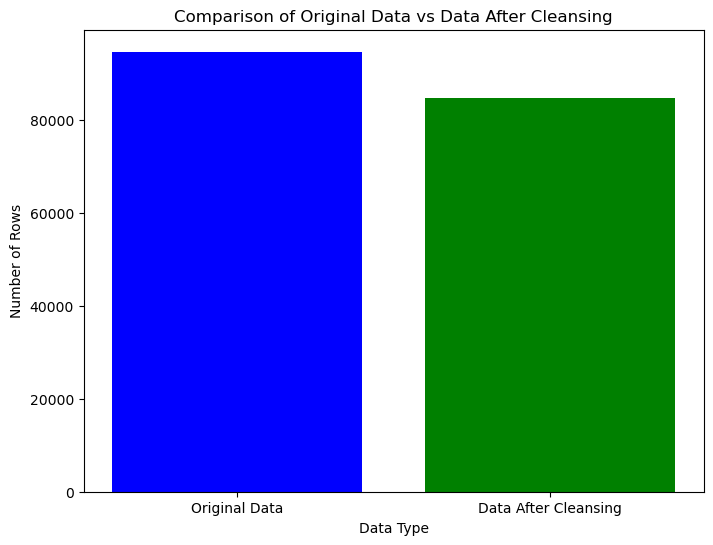

In [157]:
# Define the data
labels = ['Original Data', 'Data After Cleansing']
counts = [94626, 84590]

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=['blue', 'green'])
plt.xlabel('Data Type')
plt.ylabel('Number of Rows')
plt.title('Comparison of Original Data vs Data After Cleansing')
plt.show()

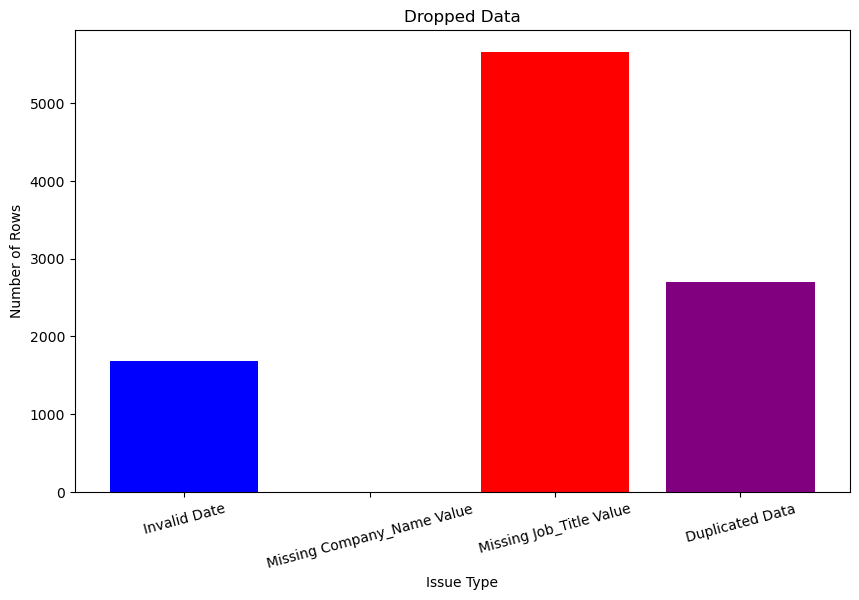

In [153]:
# Define the data
issues = ['Invalid Date', 'Missing Company_Name Value', 'Missing Job_Title Value', 'Duplicated Data']
counts = [1683, 2, 5654, 2697]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(issues, counts, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Issue Type')
plt.ylabel('Number of Rows')
plt.title('Dropped Data')
plt.xticks(rotation=15)
plt.show()


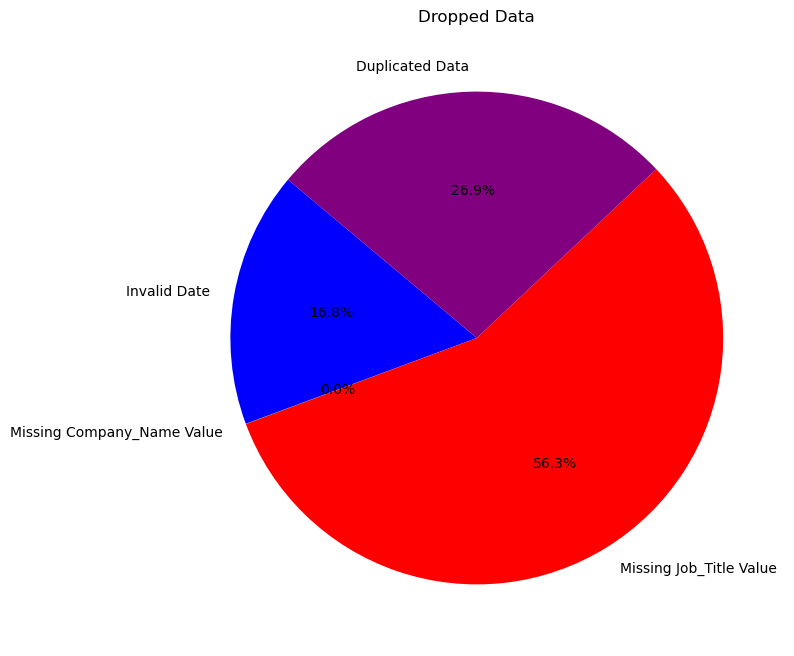

In [154]:
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=issues, autopct='%1.1f%%', startangle=140, colors=['blue', 'green', 'red', 'purple'])
plt.title('Dropped Data')
plt.show()

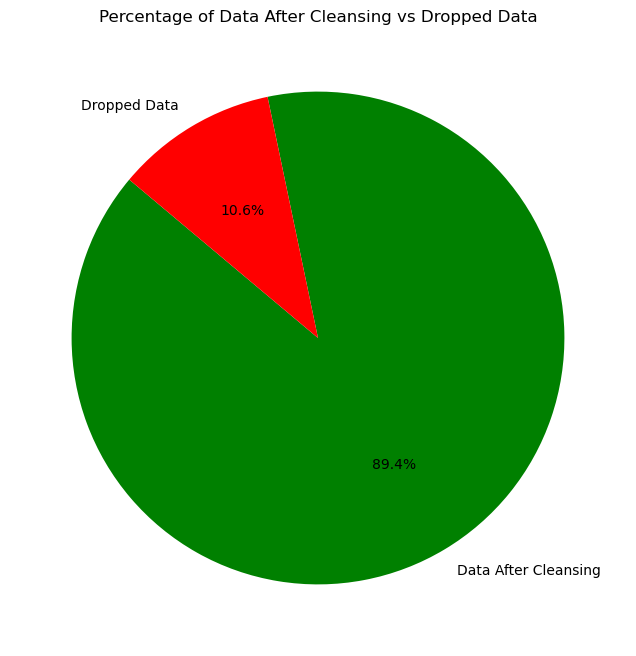

In [158]:
# Define the data
original_data = 94626
data_after_cleansing = 84590

# Calculate dropped data
dropped_data = original_data - data_after_cleansing

# Define labels and counts for the pie chart
labels = ['Data After Cleansing', 'Dropped Data']
counts = [data_after_cleansing, dropped_data]

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['green', 'red'])
plt.title('Percentage of Data After Cleansing vs Dropped Data')
plt.show()


In [160]:
df.to_csv('Cleaned_2021_2023_Data.csv')